# Super Advanced End to End E-Commerce Analysis

## Project Overview

This project aims to create a comprehensive data pipeline for analyzing e-commerce data. The workflow begins with extracting data from Snowflake, performing various transformations and analyses to generate eight distinct datasets, and finally storing the results in a PostgreSQL datamart. Each dataset serves a unique analytical purpose that contributes to a deeper understanding of customer behavior, product performance, and overall sales strategy.

Once the data is stored in PostgreSQL, we will utilize several advanced tools for further analysis, including Google Gemini for machine learning insights, Scikit Learn for predictive modeling, NLTK for natural language processing, and Transformers for sentiment analysis. Additionally, we will create a FastAPI backend to automate customer churn predictions and containerize the application with Docker for efficient deployment.

## Data Extraction and Transformation

The project involves the following key datasets extracted from Snowflake:

1. **Customer Segmentation Dataset**
   - **Description**: This dataset contains aggregated customer data, including total spending, order count, and demographics such as age and location. It provides insights into customer behavior and helps in identifying different customer segments for targeted marketing strategies.
   - **Key Metrics**: Total Spent, Order Count, Customer Age, Customer Location.

2. **Sentiment Analysis Dataset**
   - **Description**: This dataset compiles customer reviews along with product categories. It is intended for sentiment analysis to gauge customer opinions on products, which can influence inventory and marketing decisions.
   - **Key Fields**: Review ID, Product Category, Customer ID, Review Date, Review Text.

3. **Sales Forecasting Dataset**
   - **Description**: This dataset summarizes sales data over time, enabling the forecasting of future sales trends based on historical data.
   - **Key Metrics**: Total Sales Amount, Total Items Sold, Order Date.

4. **Product Stock Analysis Dataset**
   - **Description**: This dataset analyzes product stock levels against sales data to identify stock shortages and overstock situations, facilitating better inventory management.
   - **Key Metrics**: Product Category, Stock Quantity, Total Sold, Stock Left.

5. **Customer Churn Prediction Dataset**
   - **Description**: This dataset captures key metrics related to customer retention and churn, providing the foundation for churn prediction models.
   - **Key Metrics**: Last Order Date, First Order Date, Lifetime Spent, Total Orders, Days Since Last Order, Cancelled Orders.

6. **Market Basket Analysis Dataset**
   - **Description**: This dataset groups products frequently purchased together, which can be used for recommendation systems and promotional strategies.
   - **Key Fields**: Order ID, List of Products.

7. **Pricing Strategy Analysis Dataset**
   - **Description**: This dataset evaluates the pricing of products against sales, offering insights into the effectiveness of current pricing strategies.
   - **Key Metrics**: Order ID, Product Category, Quantity, Item Price, Total Price.

8. **Customer Lifetime Value (CLV) Dataset**
   - **Description**: This dataset calculates the total revenue generated from customers over their lifetime, which is crucial for understanding the long-term value of acquiring and retaining customers.
   - **Key Metrics**: Total Price, Order Frequency, Customer Name.

## Data Storage

After the transformation, all datasets are stored in a PostgreSQL datamart. This structured data storage enables efficient querying and further analysis.

## Data Analysis and Insights

Following the data ingestion into PostgreSQL, we will perform analyses using the following tools and techniques:

- **Google Gemini**: For deriving insights from machine learning models.
- **Churn Analysis**: To identify factors leading to customer churn and develop retention strategies.
- **Power BI**: For creating interactive dashboards and visualizations that present data insights clearly.
- **Scikit Learn**: For building predictive models to forecast future sales and customer behavior.
- **NLTK**: For text processing and sentiment analysis on customer reviews to extract actionable insights.
- **Transformers**: For advanced sentiment analysis, allowing us to understand customer feelings towards products better.

## Automation and Deployment

To enhance the usability of our analysis, we will create a **FastAPI** backend that facilitates automated customer churn predictions based on the developed models. The FastAPI service will expose endpoints to retrieve insights and predictions dynamically.

Additionally, the entire application will be containerized using **Docker**. This ensures seamless deployment and scalability across different environments, making it easier to manage dependencies and maintain consistency between development and production setups. The Docker container will encapsulate the FastAPI application along with all necessary libraries and configurations, allowing for efficient deployment on cloud platforms or local servers.

## Conclusion

This project embodies a comprehensive approach to e-commerce data analysis, leveraging modern technologies and methodologies to extract meaningful insights and drive business decisions. By integrating data extraction, analysis, and deployment processes, we aim to create a robust framework for ongoing e-commerce analytics.


# Tools that will be used

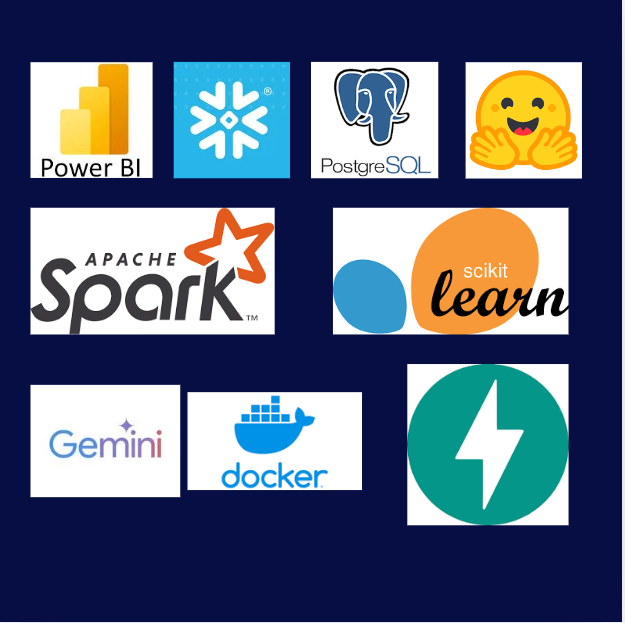

# Project Workflow

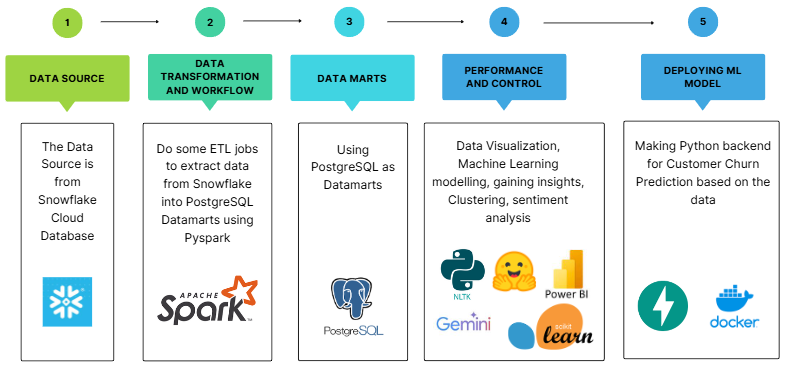

# ERD Diagram

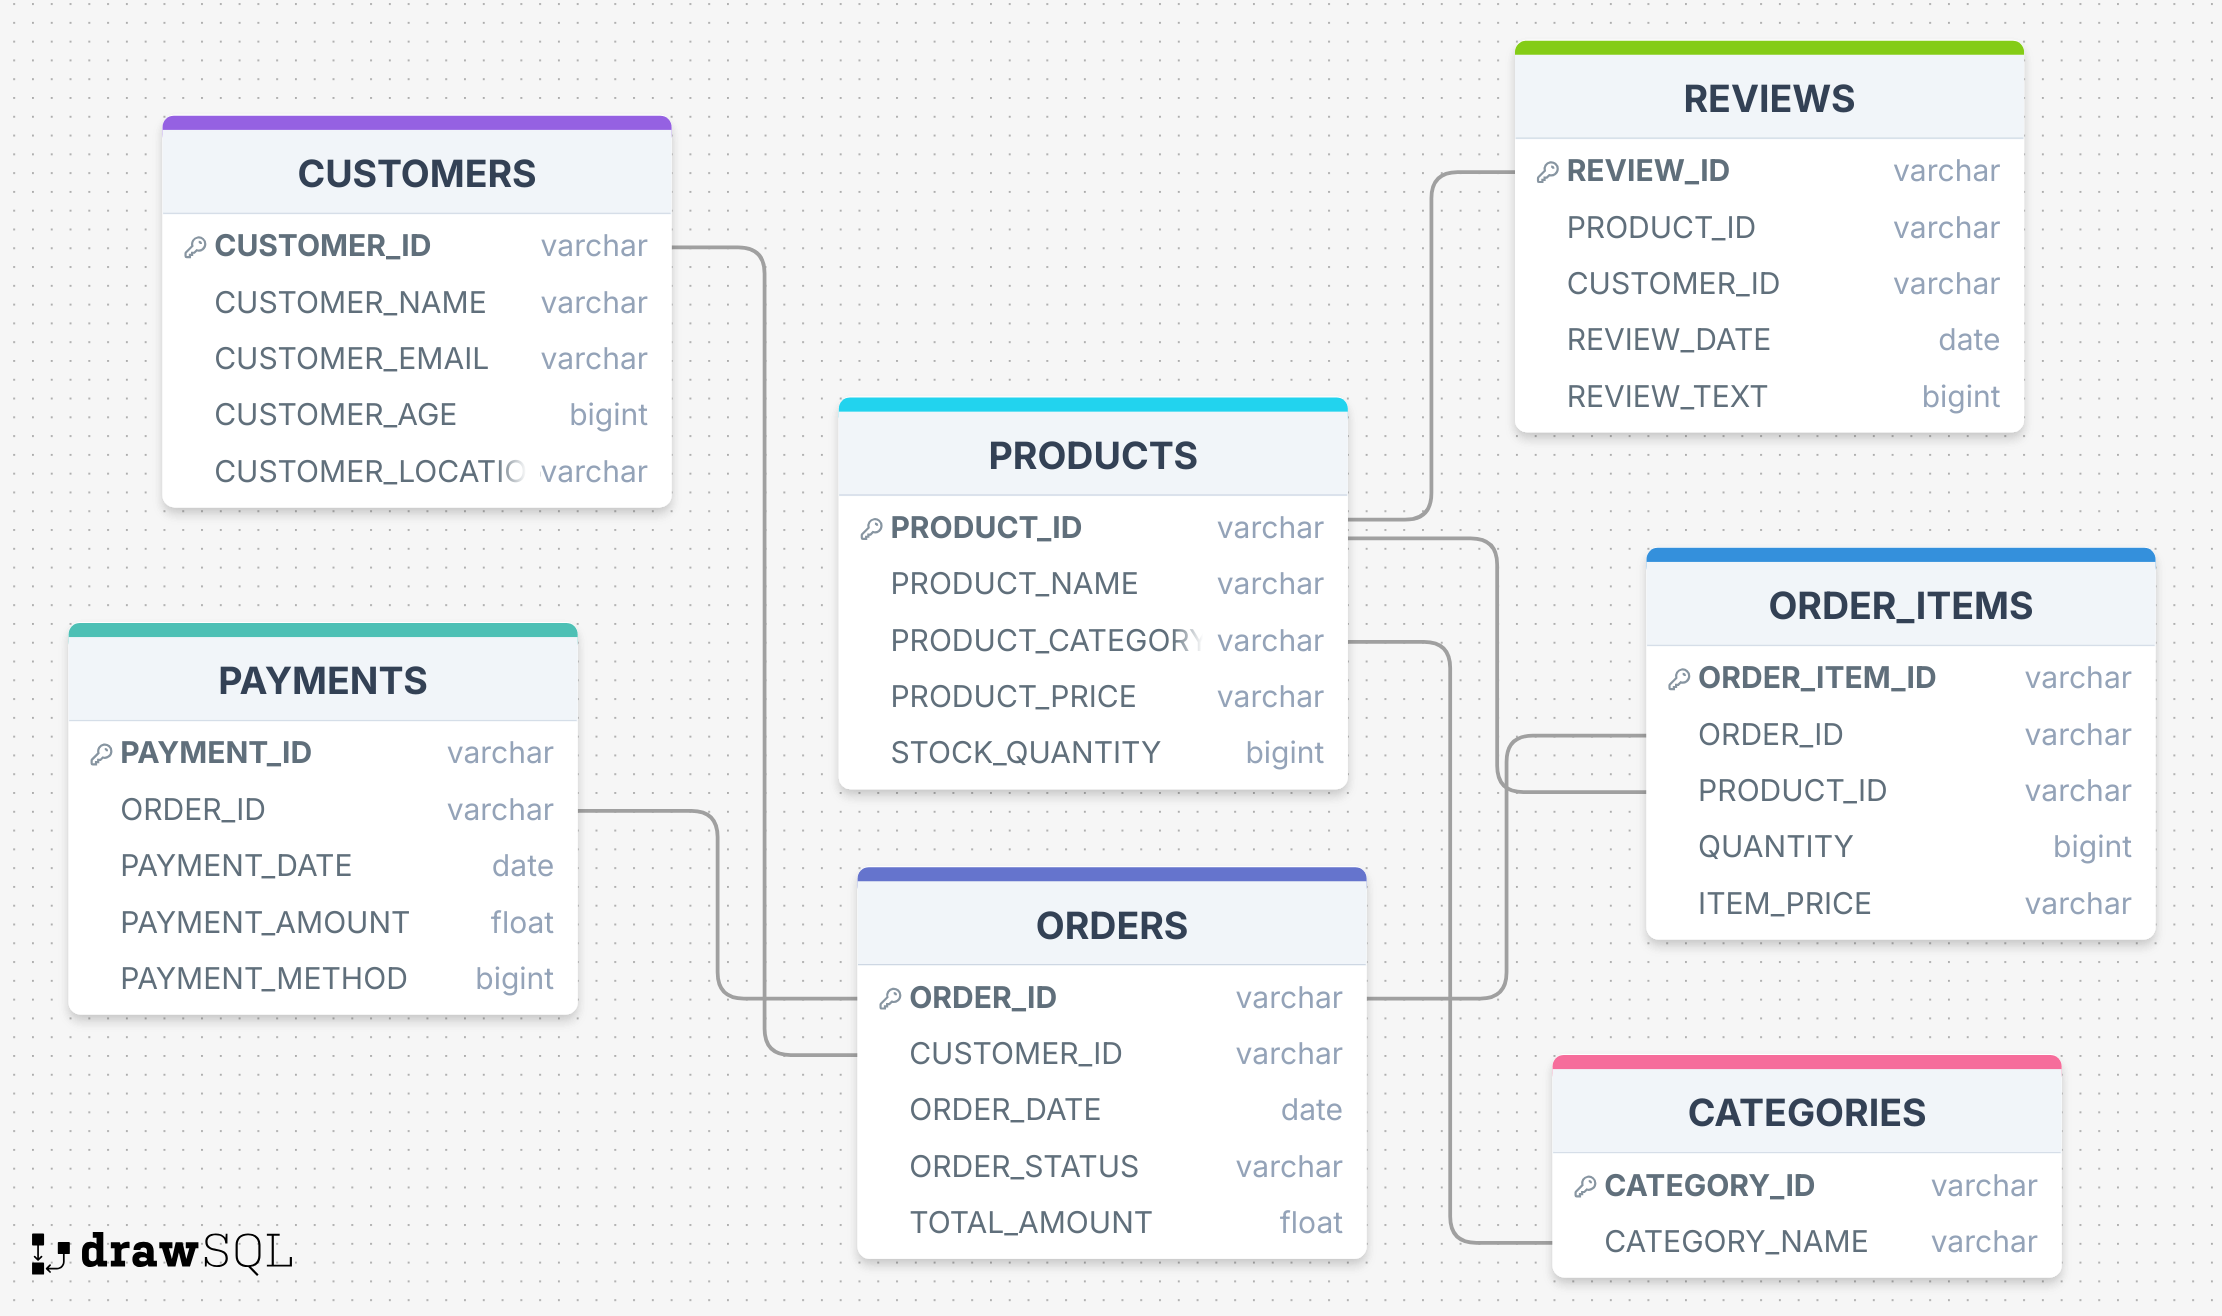

# Data Pipeline and Processing with Pyspark

In [ ]:
from pyspark.sql import SparkSession

# Initialize SparkSession with Snowflake and PostgreSQL JDBC drivers
spark = SparkSession.builder \
    .appName("SnowflakeToDataMart") \
    .config("spark.jars", "C:\\Users\\Michael\\Pyspark\\snowflake-jdbc-3.13.30.jar,C:\\Users\\Michael\\Pyspark\\spark-snowflake_2.12-2.13.0-spark_3.4.jar,C:\\Users\\Michael\\Pyspark\\postgresql-42.7.3.jar") \
    .getOrCreate()

# Snowflake connection options
sfOptions = {
    "sfURL": "https://lx25930.europe-west3.gcp.snowflakecomputing.com",
    "sfAccount": "lx25930.europe-west3.gcp",
    "sfUser": "MAGICDASH",
    "sfPassword": "****************************",
    "sfDatabase": "SALES",
    "sfSchema": "PUBLIC",
    "sfWarehouse": "COMPUTE_WH",
    "sfRole": "ACCOUNTADMIN"
}

# PostgreSQL connection options
jdbc_driver_path = "C:\\Users\\Michael\\Pyspark\\postgresql-42.7.3.jar"
jdbc_url = "jdbc:postgresql://localhost:5432/projecta"
connection_properties = {
    "user": "postgres",
    "password": "*****************************",
    "driver": "org.postgresql.Driver"
}

# Snowflake source name for Spark
SNOWFLAKE_SOURCE_NAME = "net.snowflake.spark.snowflake"

# Load tables from Snowflake into PySpark DataFrames and create temp views
spark.read.format(SNOWFLAKE_SOURCE_NAME).options(**sfOptions).option("dbtable", "CUSTOMERS").load().createOrReplaceTempView("CUSTOMERS")
spark.read.format(SNOWFLAKE_SOURCE_NAME).options(**sfOptions).option("dbtable", "ORDERS").load().createOrReplaceTempView("ORDERS")
spark.read.format(SNOWFLAKE_SOURCE_NAME).options(**sfOptions).option("dbtable", "ORDER_ITEMS").load().createOrReplaceTempView("ORDER_ITEMS")
spark.read.format(SNOWFLAKE_SOURCE_NAME).options(**sfOptions).option("dbtable", "PAYMENTS").load().createOrReplaceTempView("PAYMENTS")
spark.read.format(SNOWFLAKE_SOURCE_NAME).options(**sfOptions).option("dbtable", "PRODUCTS").load().createOrReplaceTempView("PRODUCTS")
spark.read.format(SNOWFLAKE_SOURCE_NAME).options(**sfOptions).option("dbtable", "REVIEWS").load().createOrReplaceTempView("REVIEWS")

# 1. Customer Segmentation Dataset
customer_segmentation_df = spark.sql("""
    SELECT c.CUSTOMER_NAME, c.CUSTOMER_AGE, c.CUSTOMER_LOCATION,
           SUM(oi.QUANTITY * oi.ITEM_PRICE) AS TOTAL_SPENT,
           COUNT(DISTINCT o.ORDER_ID) AS ORDER_COUNT,
           SUM(p.PAYMENT_AMOUNT) AS TOTAL_PAYMENTS
    FROM CUSTOMERS c
    LEFT JOIN ORDERS o ON c.CUSTOMER_ID = o.CUSTOMER_ID
    LEFT JOIN ORDER_ITEMS oi ON o.ORDER_ID = oi.ORDER_ID
    LEFT JOIN PAYMENTS p ON o.ORDER_ID = p.ORDER_ID
    GROUP BY c.CUSTOMER_NAME, c.CUSTOMER_AGE, c.CUSTOMER_LOCATION
""")
customer_segmentation_df.createOrReplaceTempView("CustomerSegmentation")

# 2. Sentiment Analysis Dataset
sentiment_analysis_df = spark.sql("""
    SELECT r.REVIEW_ID, p.PRODUCT_CATEGORY, r.CUSTOMER_ID, r.REVIEW_DATE, r.REVIEW_TEXT
    FROM REVIEWS r
    JOIN PRODUCTS p ON r.PRODUCT_ID = p.PRODUCT_ID
""")
sentiment_analysis_df.createOrReplaceTempView("SentimentAnalysis")

# 3. Sales Forecasting Dataset
sales_forecasting_df = spark.sql("""
    SELECT o.ORDER_ID, o.ORDER_DATE,
           SUM(oi.QUANTITY * oi.ITEM_PRICE) AS TOTAL_SALES_AMOUNT,
           SUM(oi.QUANTITY) AS TOTAL_ITEMS_SOLD
    FROM ORDERS o
    JOIN ORDER_ITEMS oi ON o.ORDER_ID = oi.ORDER_ID
    GROUP BY o.ORDER_ID, o.ORDER_DATE
""")
sales_forecasting_df.createOrReplaceTempView("SalesForecasting")

# 4. Product Stock Analysis Dataset
stock_analysis_df = spark.sql("""
    SELECT p.PRODUCT_CATEGORY, p.STOCK_QUANTITY,
           COALESCE(SUM(oi.QUANTITY), 0) AS TOTAL_SOLD,
           (p.STOCK_QUANTITY - COALESCE(SUM(oi.QUANTITY), 0)) AS STOCK_LEFT
    FROM PRODUCTS p
    LEFT JOIN ORDER_ITEMS oi ON p.PRODUCT_ID = oi.PRODUCT_ID
    GROUP BY p.PRODUCT_CATEGORY, p.STOCK_QUANTITY
""")
stock_analysis_df.createOrReplaceTempView("StockAnalysis")

# 5. Customer Churn Prediction Dataset
customer_churn_df = spark.sql("""
    SELECT
        c.CUSTOMER_NAME,
        MAX(o.ORDER_DATE) AS LAST_ORDER_DATE,
        MIN(o.ORDER_DATE) AS FIRST_ORDER_DATE,
        SUM(oi.ITEM_PRICE * oi.QUANTITY) AS LIFETIME_SPENT,
        COUNT(o.ORDER_ID) AS TOTAL_ORDERS,
        AVG(oi.ITEM_PRICE * oi.QUANTITY) AS AVG_ORDER_VALUE,
        DATEDIFF(CURRENT_DATE(), MAX(o.ORDER_DATE)) AS DAYS_SINCE_LAST_ORDER,
        MAX(p.PAYMENT_DATE) AS LAST_PAYMENT_DATE,
        SUM(p.PAYMENT_AMOUNT) AS TOTAL_PAYMENTS,
        COUNT(CASE WHEN o.ORDER_STATUS = 'Cancelled' THEN 1 END) AS CANCELLED_ORDERS
    FROM
        ORDERS o
    LEFT JOIN
        CUSTOMERS c ON o.CUSTOMER_ID = c.CUSTOMER_ID
    LEFT JOIN
        ORDER_ITEMS oi ON o.ORDER_ID = oi.ORDER_ID
    LEFT JOIN
        PAYMENTS p ON o.ORDER_ID = p.ORDER_ID
    GROUP BY
        c.CUSTOMER_NAME
""")
customer_churn_df.createOrReplaceTempView("CustomerChurn")

# 6. Market Basket Analysis Dataset
market_basket_df = spark.sql("""
    SELECT oi.ORDER_ID, COLLECT_LIST(p.PRODUCT_CATEGORY) AS PRODUCTS
    FROM ORDER_ITEMS oi
    JOIN PRODUCTS p ON oi.PRODUCT_ID = p.PRODUCT_ID
    GROUP BY oi.ORDER_ID
""")
market_basket_df.createOrReplaceTempView("MarketBasket")

# 7. Pricing Strategy Analysis Dataset
pricing_strategy_df = spark.sql("""
    SELECT oi.ORDER_ID, p.PRODUCT_CATEGORY, oi.QUANTITY, oi.ITEM_PRICE, o.ORDER_DATE, (oi.ITEM_PRICE * oi.QUANTITY) AS TOTAL_PRICE
    FROM ORDER_ITEMS oi
    JOIN ORDERS o ON oi.ORDER_ID = o.ORDER_ID
    JOIN PRODUCTS p ON oi.PRODUCT_ID = p.PRODUCT_ID
""")
pricing_strategy_df.createOrReplaceTempView("PricingStrategy")

# 8. Customer Lifetime Value (CLV) Dataset
clv_df = spark.sql("""
    SELECT c.CUSTOMER_NAME,
           SUM(oi.ITEM_PRICE * oi.QUANTITY) AS TOTAL_PRICE,
           COUNT(o.ORDER_DATE) AS ORDER_FREQUENCY
    FROM ORDERS o
    JOIN CUSTOMERS c ON o.CUSTOMER_ID = c.CUSTOMER_ID
    JOIN ORDER_ITEMS oi ON o.ORDER_ID = oi.ORDER_ID
    GROUP BY c.CUSTOMER_NAME
""")
clv_df.createOrReplaceTempView("CustomerLifetimeValue")

# Save each dataset into PostgreSQL for further analysis
datasets = {
    "CustomerSegmentation": customer_segmentation_df,
    "SentimentAnalysis": sentiment_analysis_df,
    "SalesForecasting": sales_forecasting_df,
    "StockAnalysis": stock_analysis_df,
    "CustomerChurn": customer_churn_df,
    "MarketBasket": market_basket_df,
    "PricingStrategy": pricing_strategy_df,
    "CustomerLifetimeValue": clv_df
}

for table_name, df in datasets.items():
    df.write.jdbc(url=jdbc_url, table=table_name, mode="overwrite", properties=connection_properties)


# Import all of the Data from PostgreSQL Datamart

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [2]:
import pandas as pd
import psycopg2
from psycopg2 import OperationalError

try:
    # Attempt to establish a connection to PostgreSQL
    connection = psycopg2.connect(
        host="localhost",
        dbname="projecta",
        user="postgres",
        password="permataputihg101",
        port="5432"
    )
    print("Connection Success")

except OperationalError as e:
    print("Connection Failed")
    print(f"Error details: {e}")

Connection Success


# Customer Churn Analysis

In [3]:
query = "SELECT * FROM public.customerchurn"
df = pd.read_sql_query(query, connection)
df.head()

C:\Users\Michael\AppData\Local\Temp\ipykernel_25296\4083854341.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,CUSTOMER_NAME,LAST_ORDER_DATE,FIRST_ORDER_DATE,LIFETIME_SPENT,TOTAL_ORDERS,AVG_ORDER_VALUE,DAYS_SINCE_LAST_ORDER,LAST_PAYMENT_DATE,TOTAL_PAYMENTS,CANCELLED_ORDERS
0,Austin Werner,2024-09-26,2023-01-22,24239.28,27,1425.840000,39,2024-08-12,12776.96,14
1,Laura Best,2024-08-08,2023-03-30,25901.24,28,996.201538,88,2024-08-15,14513.17,10
2,Benjamin White,2024-10-16,2022-12-01,14782.09,19,821.227222,19,2024-07-22,7605.87,0
3,Jared Bennett,2024-09-09,2023-02-17,24186.92,18,1422.760000,56,2024-09-14,6249.41,11
4,Deborah Shaw,2024-07-14,2023-03-02,34600.92,25,1384.036800,113,2024-09-14,16586.12,7


In [4]:
# Create the Churn column based on the condition
df['Churn'] = df['DAYS_SINCE_LAST_ORDER'].apply(lambda x: "Churn" if x > 60 else "Not Churn")
df.head()

,CUSTOMER_NAME,LAST_ORDER_DATE,FIRST_ORDER_DATE,LIFETIME_SPENT,TOTAL_ORDERS,AVG_ORDER_VALUE,DAYS_SINCE_LAST_ORDER,LAST_PAYMENT_DATE,TOTAL_PAYMENTS,CANCELLED_ORDERS,Churn
0,Austin Werner,2024-09-26,2023-01-22,24239.28,27,1425.840000,39,2024-08-12,12776.96,14,Not Churn
1,Laura Best,2024-08-08,2023-03-30,25901.24,28,996.201538,88,2024-08-15,14513.17,10,Churn
2,Benjamin White,2024-10-16,2022-12-01,14782.09,19,821.227222,19,2024-07-22,7605.87,0,Not Churn
3,Jared Bennett,2024-09-09,2023-02-17,24186.92,18,1422.760000,56,2024-09-14,6249.41,11,Not Churn
4,Deborah Shaw,2024-07-14,2023-03-02,34600.92,25,1384.036800,113,2024-09-14,16586.12,7,Churn


In [5]:
# Drop unused columns
df.drop(columns=['CUSTOMER_NAME', 'LAST_ORDER_DATE', 'FIRST_ORDER_DATE', 'DAYS_SINCE_LAST_ORDER', 'LAST_PAYMENT_DATE'], inplace=True)
df.head()

,LIFETIME_SPENT,TOTAL_ORDERS,AVG_ORDER_VALUE,TOTAL_PAYMENTS,CANCELLED_ORDERS,Churn
0,24239.28,27,1425.840000,12776.96,14,Not Churn
1,25901.24,28,996.201538,14513.17,10,Churn
2,14782.09,19,821.227222,7605.87,0,Not Churn
3,24186.92,18,1422.760000,6249.41,11,Not Churn
4,34600.92,25,1384.036800,16586.12,7,Churn


## Exploratory Data Analysis

In [6]:
import textwrap
import google.generativeai as genai
from IPython.display import display
from IPython.display import Markdown

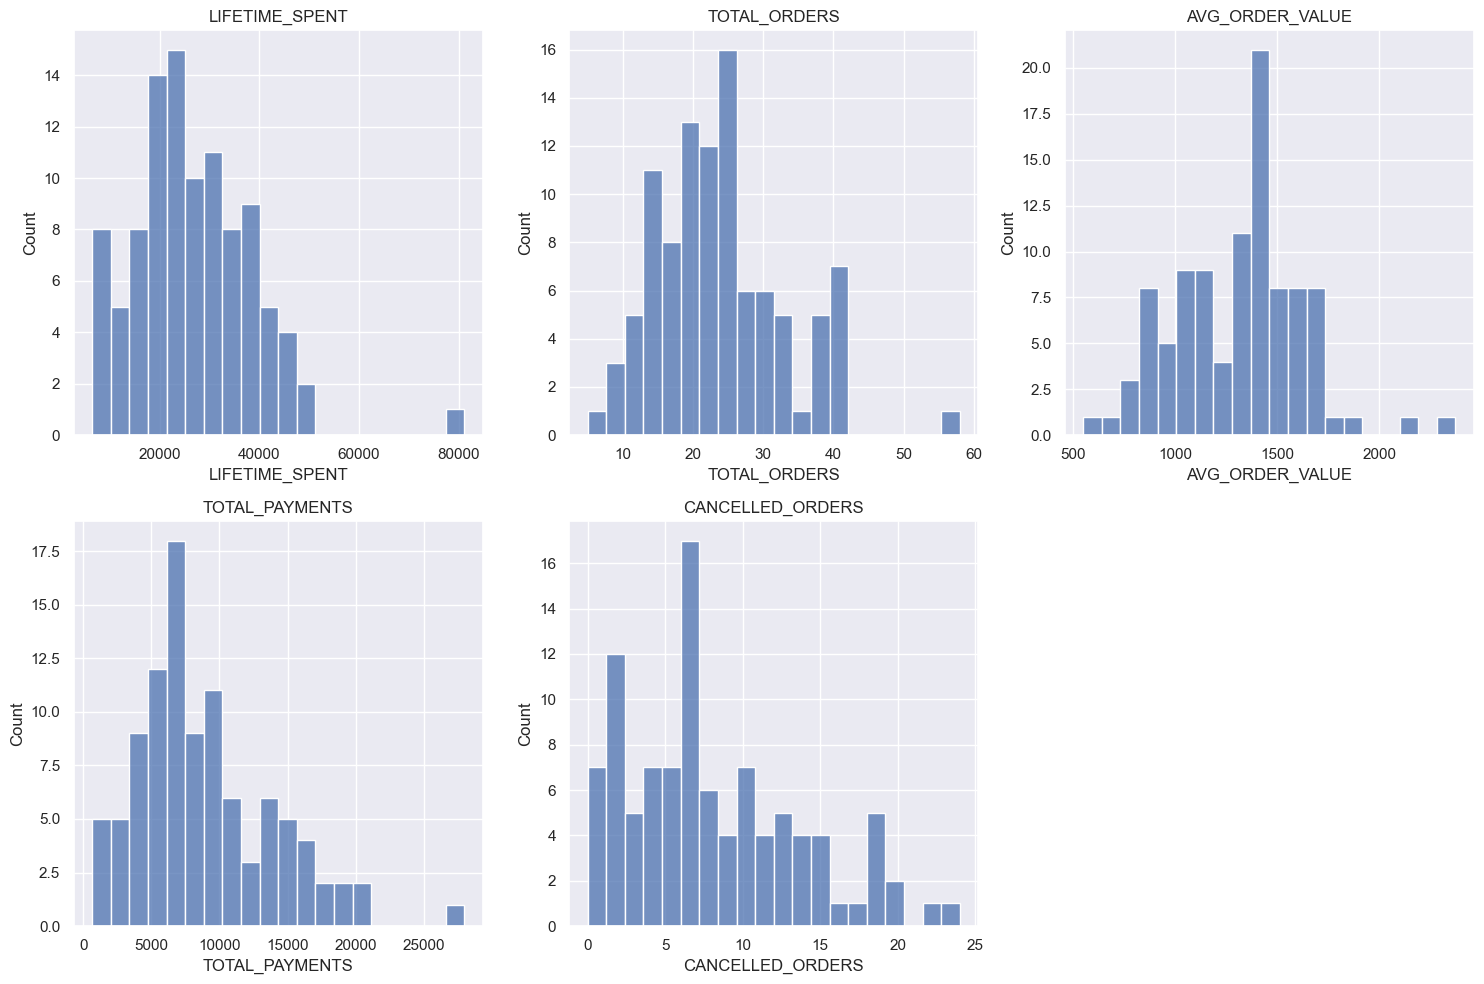

In [7]:
# Get the names of all columns with data type 'int' and 'float'
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram plot for each numeric variable using Seaborn
for i, var in enumerate(num_vars):
    sns.histplot(df[var], ax=axs[i], bins=20, kde=False)  # You can adjust bins and kde
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Save plot to file
plt.savefig('histoplot.png', dpi=300)

# Show plot
plt.show()

In [8]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="****************************************")

import PIL.Image

img = PIL.Image.open("histoplot.png")
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(img)

response = model.generate_content(["Explain it by points in simple and clear terms. Provide key findings and actionable insights based on the histogramplot", img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> The histograms show the distribution of different customer metrics. Here's a breakdown:
> 
> **1. Lifetime Spent:**
> 
> * **Key Finding:**  The majority of customers have spent between 10,000 and 40,000. There's a smaller group that has spent significantly more, around 75,000.
> * **Actionable Insight:** This suggests you have two customer segments: high-value customers (spending over 40,000) and the majority segment. Consider targeted strategies to retain high-value customers and potentially upsell to the majority segment. 
> 
> **2. Total Orders:**
> 
> * **Key Finding:** Most customers have placed between 15 and 30 orders. There's a peak around 20 orders, indicating a common ordering frequency.
> * **Actionable Insight:** This provides insights into average customer behavior.  Use this information to tailor loyalty programs, reward programs, or promotions to encourage repeat orders.
> 
> **3. Avg Order Value:**
> 
> * **Key Finding:** The average order value is highly concentrated around 1500, with a few customers having significantly higher average order values (around 2000).
> * **Actionable Insight:** This indicates you have a core customer base with relatively similar spending habits.  Identify those with higher average order values, and explore why their spending is higher.  Could they be purchasing higher-priced products?
> 
> **4. Total Payments:**
> 
> * **Key Finding:** Most customers have made between 500 and 1500 total payments. There's a peak around 6000 payments, indicating a higher volume of purchases for some customers.
> * **Actionable Insight:** This is similar to the total order distribution, suggesting that most customers make consistent purchases over time.  Identify the customers with a high number of payments to understand their purchasing behavior and potential opportunities for upselling.
> 
> **5. Cancelled Orders:**
> 
> * **Key Finding:**  The majority of customers have cancelled between 0 and 10 orders. There's a peak around 17 cancellations, indicating a higher cancellation rate for a small group of customers.
> * **Actionable Insight:** Analyze the customers with a higher cancellation rate to understand the reasons behind it.  Are there specific products or processes causing issues? Addressing these issues could reduce cancellations and improve customer satisfaction. 


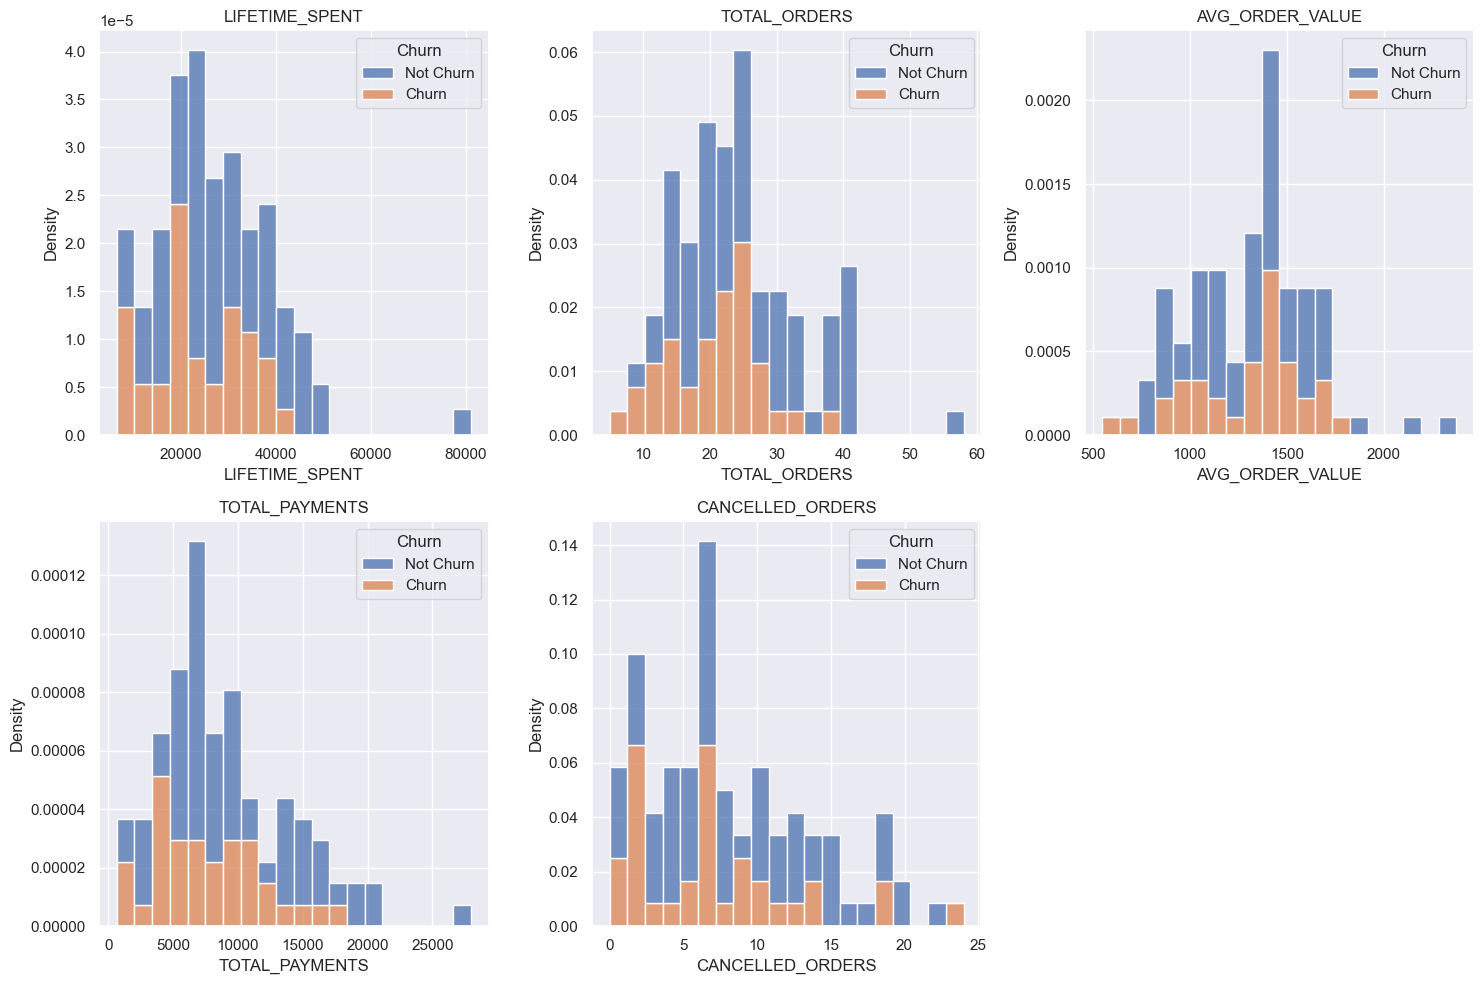

In [9]:
# Get the names of all numeric columns with data type 'int' and 'float'
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram plot for each numeric variable using Seaborn
for i, var in enumerate(num_vars):
    sns.histplot(data=df, x=var, hue='Churn', ax=axs[i], bins=20, kde=False, stat='density', multiple='stack')  # Stacked histograms
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Save plot to file
plt.savefig('histoplot_multiclass.png', dpi=300)

# Show plot
plt.show()

In [10]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="**************************************")

import PIL.Image

img = PIL.Image.open("histoplot_multiclass.png")
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(img)

response = model.generate_content(["Explain it by points in simple and clear terms. Provide key findings and actionable insights based on the histogram multiclass plot", img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> The histogram multiclass plot shows the distribution of different customer behaviors based on churn status. Here are the key findings and actionable insights:
> 
> * **Lifetime spent:** Customers who churned have a slightly lower lifetime spend compared to customers who didn't churn.
> * **Total orders:** Customers who churned tend to have a slightly lower number of total orders compared to customers who didn't churn. This could indicate that they are not as engaged with the product.
> * **Avg order value:** Customers who churned have a slightly lower average order value compared to customers who didn't churn. This could indicate that they are less willing to spend money on the product.
> * **Total payments:** Customers who churned have a lower total number of payments compared to customers who didn't churn. This could indicate that they are not as committed to the product.
> * **Cancelled orders:** Customers who churned have a higher number of cancelled orders compared to customers who didn't churn. This could indicate that they are not as satisfied with the product.
> 
> **Actionable insights:**
> 
> * **Focus on increasing customer lifetime value:** This can be achieved by offering incentives for repeat purchases, providing excellent customer service, and developing engaging content.
> * **Improve the product or service:** This could involve addressing issues that are causing customers to cancel orders, such as poor product quality or slow shipping times.
> * **Personalize marketing efforts:** By understanding customer preferences and purchase history, businesses can tailor marketing messages to increase engagement and loyalty.
> * **Monitor customer behavior:** It is important to track customer metrics such as lifetime spend, total orders, and average order value to identify potential churn risks early on.
> * **Offer loyalty programs:** This can incentivize customers to continue making purchases and build a sense of community.
> * **Address customer issues promptly:** Resolving customer complaints and issues quickly can help to improve customer satisfaction and prevent churn.
> * **Develop a customer retention strategy:** This should involve a multi-pronged approach that addresses the key drivers of customer churn.
> * **Conduct regular customer surveys:** Gather feedback from customers to understand their needs and pain points. This can help to improve the product or service and reduce churn rates.
> * **Create a positive customer experience:**  Focus on providing a seamless and enjoyable customer experience across all touchpoints.
> 
> By implementing these insights, businesses can take steps to improve customer retention and reduce churn.


## Check the Amount of missing value

In [11]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Display the result
print(missing_percentage)

LIFETIME_SPENT      0.0
TOTAL_ORDERS        0.0
AVG_ORDER_VALUE     0.0
TOTAL_PAYMENTS      0.0
CANCELLED_ORDERS    0.0
Churn               0.0
dtype: float64


## Label Encoding for each Object datatype

In [12]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Churn: ['Not Churn' 'Churn']


In [13]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Churn: [1 0]


## Correlation Heatmap

<Axes: >

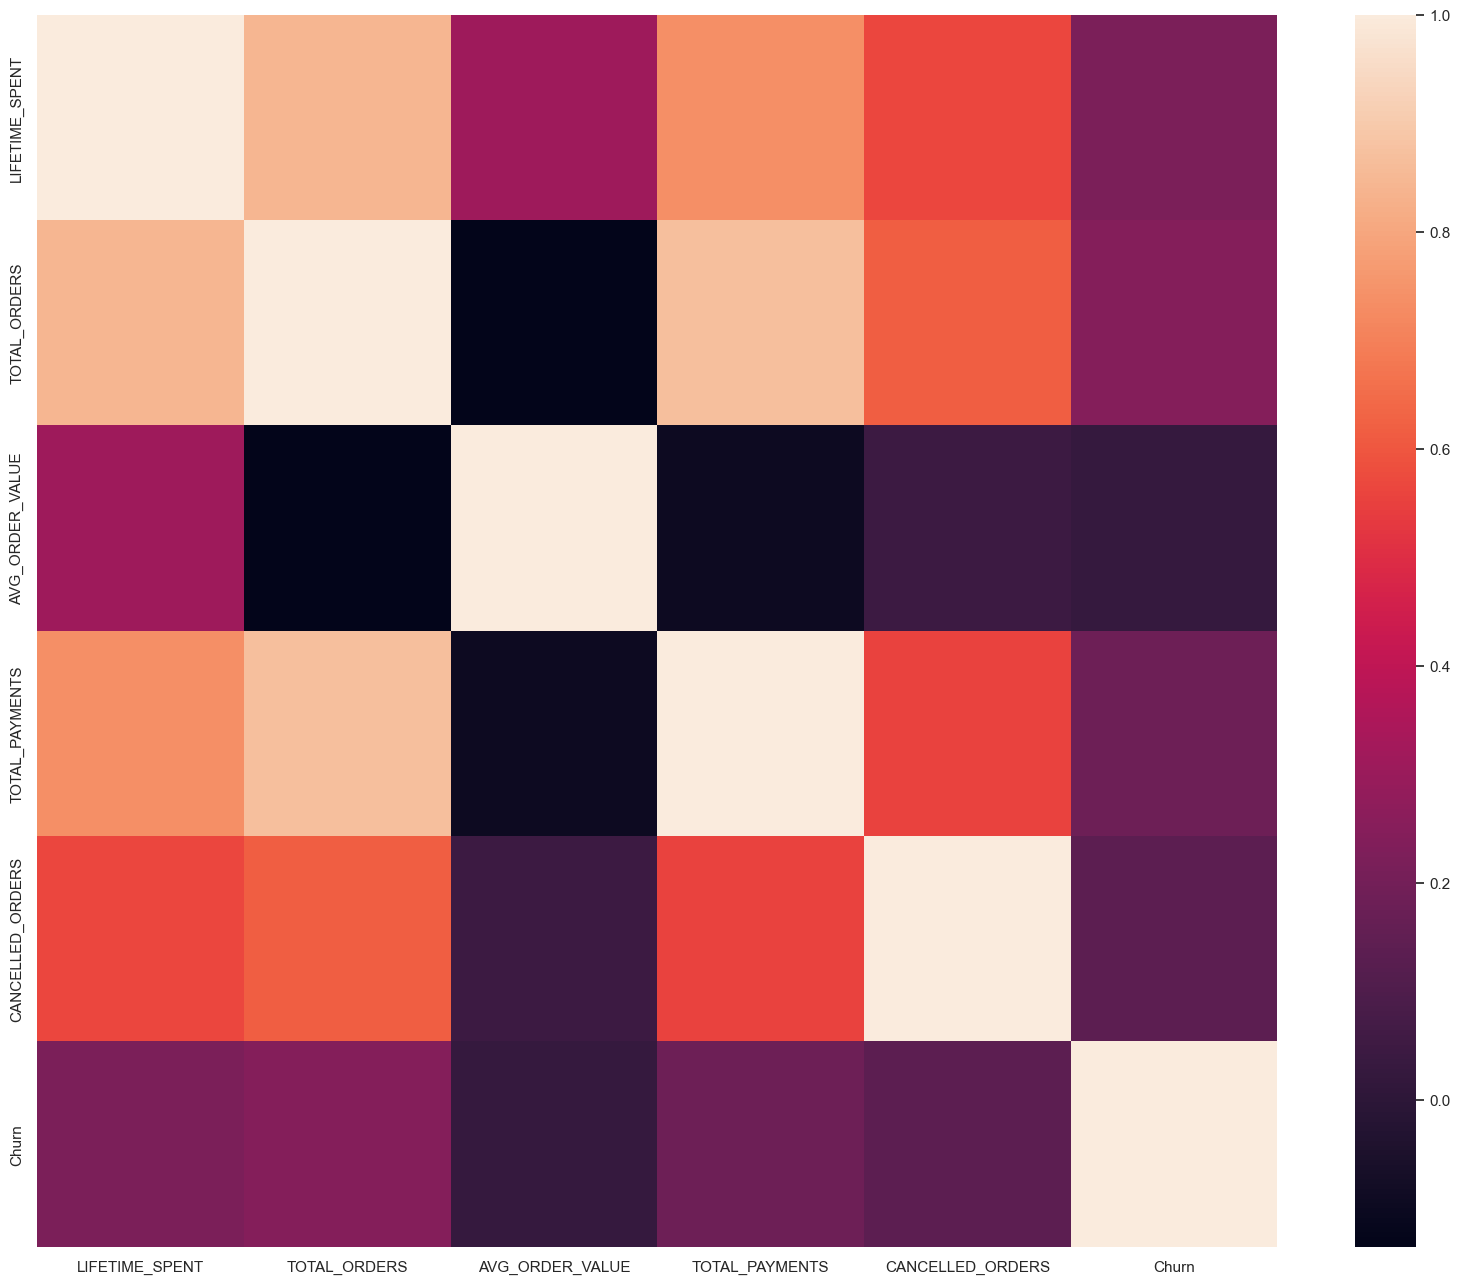

In [14]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g')

## Train Test Split

In [15]:
X = df.drop('Churn', axis=1)
y = df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 42}


In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, max_depth=None, max_features='sqrt', n_estimators=200, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [18]:
from sklearn.metrics import accuracy_score
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 80.0 %


In [19]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8000000000000002
Precision Score :  0.8
Recall Score :  0.8
Jaccard Score :  0.6666666666666666
Log Loss :  7.20873067782343


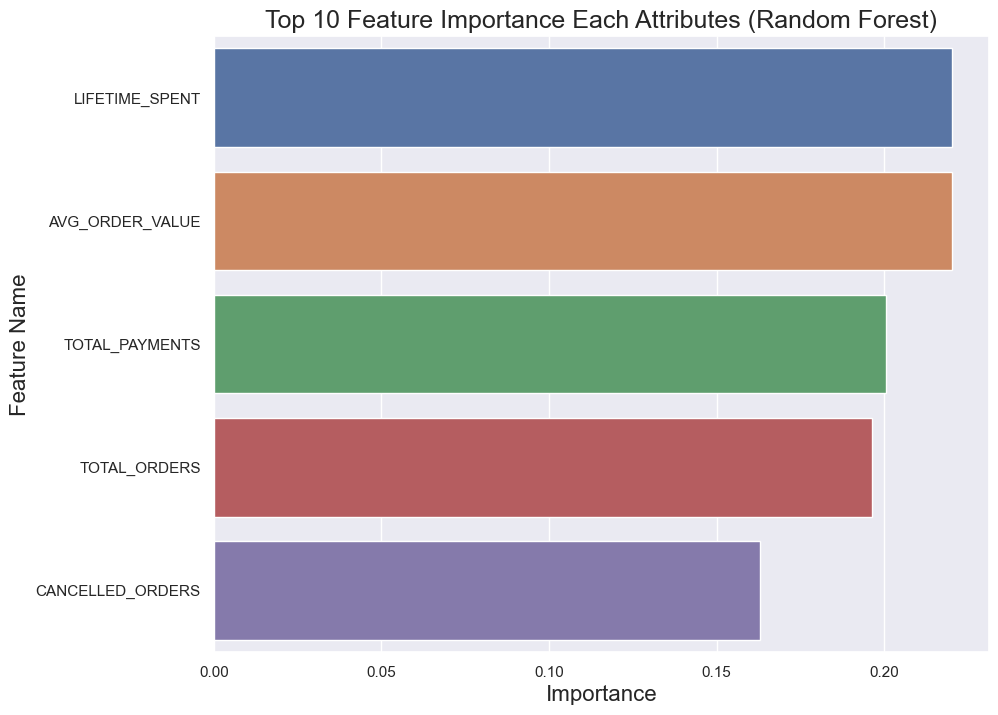

In [20]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)

# Save the plot as a PNG file
plt.savefig('feature_importance.png', format='png', bbox_inches='tight')

plt.show()

In [21]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="****************************************************")

import PIL.Image

img = PIL.Image.open("feature_importance.png")
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(img)

response = model.generate_content(["Explain it by points in simple and clear terms. Provide key findings and actionable insights based on the random forest classifier feature importance", img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> The feature importance plot shows the top 5 most important features for predicting the target variable in a random forest classifier. 
> 
> Here are the key findings and actionable insights:
> 
> * **LIFETIME_SPENT** is the most important feature, indicating that the total amount spent by a customer is a strong predictor of the target variable. This suggests that focusing on customer lifetime value and encouraging repeat purchases is crucial for success. 
> * **AVG_ORDER_VALUE** is the second most important feature, suggesting that the average value of each order is also a strong predictor. This could indicate that customers who make larger purchases are more likely to be...  (fill in the target variable here).
> * **TOTAL_PAYMENTS** and **TOTAL_ORDERS** are also important features, suggesting that the frequency of purchases and payments are also significant factors. This indicates that encouraging frequent transactions and repeat orders is important.
> * **CANCELLED_ORDERS** is relatively less important compared to the other features, but still plays a role in the model's predictions. This suggests that the number of cancelled orders may have a negative impact on the target variable. 
> 
> **Actionable Insights**
> 
> * **Focus on customer lifetime value:** Implement strategies to encourage repeat purchases and increase customer loyalty. This could involve loyalty programs, personalized recommendations, and targeted marketing campaigns.
> * **Optimize average order value:** Offer product bundles, promotions, or upselling opportunities to increase the average value of each order.
> * **Increase purchase frequency:** Encourage customers to make repeat purchases through reminders, loyalty programs, and personalized recommendations.
> * **Minimize cancellations:** Investigate reasons for cancelled orders and implement strategies to reduce them. This could involve improving customer support, providing clear order information, and offering flexible return policies. 


# Customer Segmentation

In [22]:
query = "SELECT * FROM public.customersegmentation"
df = pd.read_sql_query(query, connection)
df.head()

C:\Users\Michael\AppData\Local\Temp\ipykernel_25296\3408163682.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,CUSTOMER_NAME,CUSTOMER_AGE,CUSTOMER_LOCATION,TOTAL_SPENT,ORDER_COUNT,TOTAL_PAYMENTS
0,Tanner Colon,57.0,Mexico,48620.79,15,15796.87
1,Jesse Zuniga,58.0,South Korea,35089.58,15,6885.89
2,Robin Gregory,59.0,Japan,21342.62,11,11328.38
3,Felicia Mitchell,42.0,Canada,7643.82,4,1741.23
4,Ashley Greene,21.0,France,30023.83,11,16533.81


In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

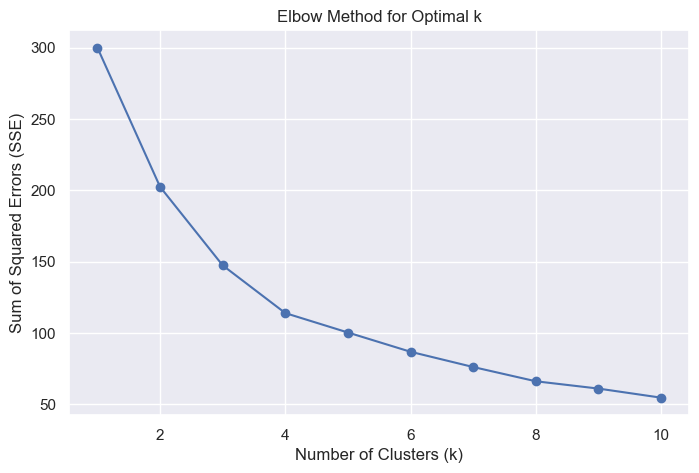

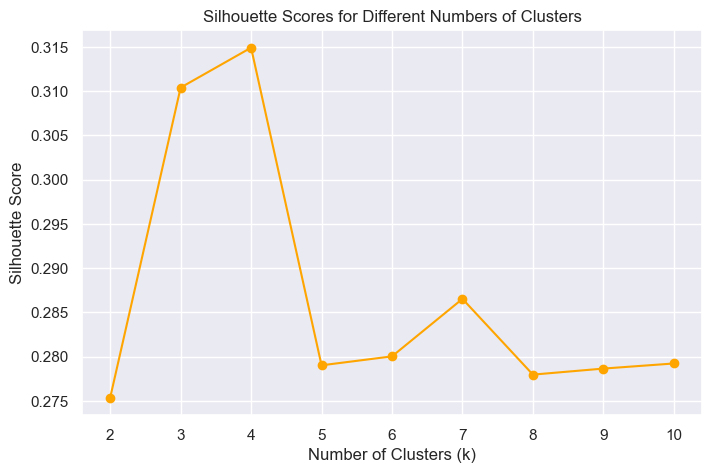

In [25]:
import warnings
warnings.filterwarnings("ignore")
# Select features for clustering
X = df[['CUSTOMER_AGE', 'TOTAL_SPENT', 'ORDER_COUNT']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to find the optimal number of clusters
sse = []  # Sum of Squared Errors
k_range = range(1, 11)  # Testing k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Silhouette Scores for different numbers of clusters
silhouette_scores = []

for k in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

In [26]:
# Select features for clustering
X = df[['CUSTOMER_AGE', 'TOTAL_SPENT', 'ORDER_COUNT']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans Clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head()

,CUSTOMER_NAME,CUSTOMER_AGE,CUSTOMER_LOCATION,TOTAL_SPENT,ORDER_COUNT,TOTAL_PAYMENTS,Cluster
0,Tanner Colon,57.0,Mexico,48620.79,15,15796.87,2
1,Jesse Zuniga,58.0,South Korea,35089.58,15,6885.89,2
2,Robin Gregory,59.0,Japan,21342.62,11,11328.38,0
3,Felicia Mitchell,42.0,Canada,7643.82,4,1741.23,1
4,Ashley Greene,21.0,France,30023.83,11,16533.81,3


In [28]:
# Cluster 0
cluster_0 = df[df['Cluster'] == 0]
cluster_0.head()

,CUSTOMER_NAME,CUSTOMER_AGE,CUSTOMER_LOCATION,TOTAL_SPENT,ORDER_COUNT,TOTAL_PAYMENTS,Cluster
2,Robin Gregory,59.0,Japan,21342.62,11,11328.38,0
7,Brittany Lindsey,56.0,France,19623.32,9,7348.11,0
10,Nancy Campbell,56.0,China,20647.50,7,7338.91,0
17,Brandon Garcia,54.0,United Kingdom,20336.45,12,9178.48,0
18,Tamara Pearson,69.0,United States,10920.60,9,1114.74,0


In [29]:
# Cluster 1
cluster_1 = df[df['Cluster'] == 1]
cluster_1.head()

,CUSTOMER_NAME,CUSTOMER_AGE,CUSTOMER_LOCATION,TOTAL_SPENT,ORDER_COUNT,TOTAL_PAYMENTS,Cluster
3,Felicia Mitchell,42.0,Canada,7643.82,4,1741.23,1
5,Brandon Williams,38.0,Canada,24025.36,8,4952.43,1
12,Jacob Kim,18.0,United States,14374.62,7,6583.32,1
15,Katie Anderson,27.0,China,7142.94,8,4833.72,1
19,William Watson,53.0,Canada,7681.05,5,2553.92,1


In [30]:
# Cluster 2
cluster_2 = df[df['Cluster'] == 2]
cluster_2.head()

,CUSTOMER_NAME,CUSTOMER_AGE,CUSTOMER_LOCATION,TOTAL_SPENT,ORDER_COUNT,TOTAL_PAYMENTS,Cluster
0,Tanner Colon,57.0,Mexico,48620.79,15,15796.87,2
1,Jesse Zuniga,58.0,South Korea,35089.58,15,6885.89,2
9,Kayla Mann,49.0,France,37831.23,12,7256.60,2
13,Joshua Flores,53.0,Canada,46301.36,16,18540.23,2
22,James Mcclure,65.0,France,37695.04,12,13322.37,2


In [31]:
# Cluster 3
cluster_3 = df[df['Cluster'] == 3]
cluster_3.head()

,CUSTOMER_NAME,CUSTOMER_AGE,CUSTOMER_LOCATION,TOTAL_SPENT,ORDER_COUNT,TOTAL_PAYMENTS,Cluster
4,Ashley Greene,21.0,France,30023.83,11,16533.81,3
6,Paul Berg,29.0,France,22948.95,12,7265.78,3
8,Tina Carroll,18.0,Canada,38501.88,17,18110.69,3
11,Sarah Gutierrez,26.0,South Korea,46639.36,14,15256.85,3
14,David Bell,32.0,Canada,27097.05,13,9679.00,3


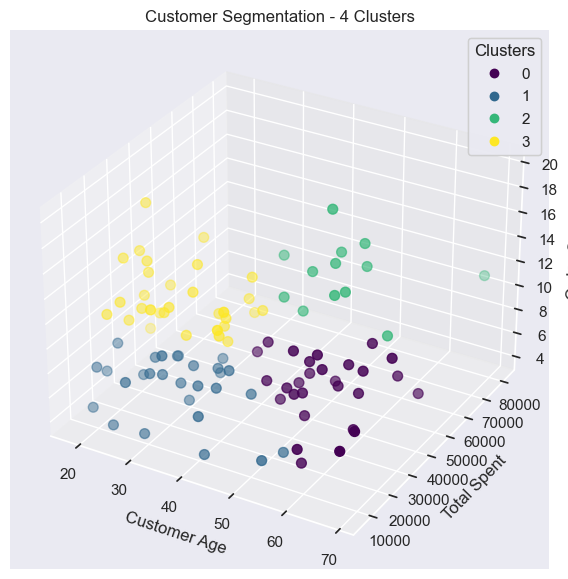

In [32]:
# 3D Visualization of the Clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df['CUSTOMER_AGE'], 
    df['TOTAL_SPENT'], 
    df['ORDER_COUNT'], 
    c=df['Cluster'], 
    cmap='viridis', 
    s=50
)

# Setting labels and title
ax.set_xlabel('Customer Age')
ax.set_ylabel('Total Spent')
ax.set_zlabel('Order Count')
plt.title('Customer Segmentation - 4 Clusters')

# Add a color legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Save the plot as a PNG file
plt.savefig('cluster.png', format='png', bbox_inches='tight')

plt.show()

In [33]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="*********************************************")

import PIL.Image

img = PIL.Image.open("cluster.png")
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(img)

response = model.generate_content(["Explain it by points in simple and clear terms. Provide key findings and actionable insights based on the 3d cluster visualization", img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> The 3D cluster visualization shows customer segmentation into 4 clusters based on customer age, total spent and number of purchases. 
> 
> Here are the key findings:
> 
> **Cluster 0:** This cluster contains customers with **older age (55-75)**, **higher total spent (40k - 80k)** and **fewer purchases (3-6)**.  This group represents **high-value customers** who spend significantly more than other groups.  
> 
> **Cluster 1:**  This cluster is characterized by **younger customers (20-45)** with **moderate total spent (10k-40k)** and **moderate number of purchases (5-10)**.  They are **regular customers** who contribute to overall revenue.
> 
> **Cluster 2:** This cluster consists of **older customers (50-70)** with **higher total spent (30k-60k)** and **higher number of purchases (10-15)**. They are **loyal customers** with a higher purchasing frequency. 
> 
> **Cluster 3:** This cluster has the **youngest customers (25-40)** with **moderate total spent (15k-40k)** and **higher number of purchases (10-15)**. These are **frequent buyers** who might be looking for deals and discounts.
> 
> **Actionable insights:**
> 
> * **Target Cluster 0 with personalized offers:** Focus on luxury items, premium services, and exclusive deals to retain and grow this high-value segment.
> * **Nurture Cluster 1 with loyalty programs:** Develop loyalty programs and offer incentives to encourage repeat purchases and increase customer lifetime value. 
> * **Increase engagement with Cluster 2:** Offer personalized recommendations based on their purchase history and preferences to increase their engagement and spending. 
> * **Convert Cluster 3 into loyal customers:**  Explore strategies to convert this group into higher-value customers by offering personalized promotions and exclusive product recommendations based on their shopping habits. 


# Customer Lifetime Value

In [34]:
query = "SELECT * FROM public.customerlifetimevalue"
df = pd.read_sql_query(query, connection)
df.head()

,CUSTOMER_NAME,TOTAL_PRICE,ORDER_FREQUENCY
0,Tanner Colon,34663.06,23
1,Jesse Zuniga,30466.94,23
2,Robin Gregory,17905.39,19
3,Felicia Mitchell,7643.82,5
4,Ashley Greene,20005.41,22


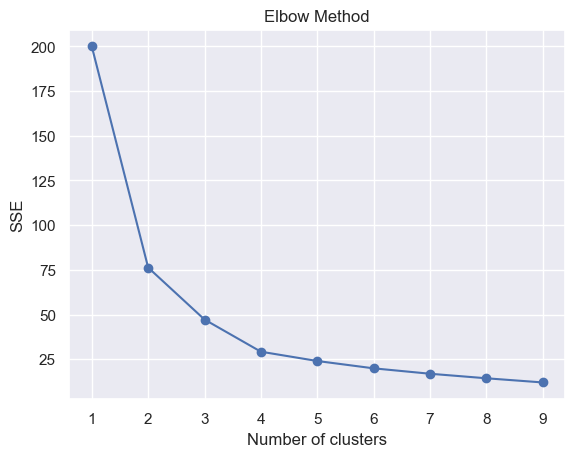

In [35]:
# Select features
X = df[['TOTAL_PRICE', 'ORDER_FREQUENCY']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal clusters using the elbow method
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [36]:
# Apply KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)  
df['Cluster'] = kmeans.fit_predict(X_scaled)

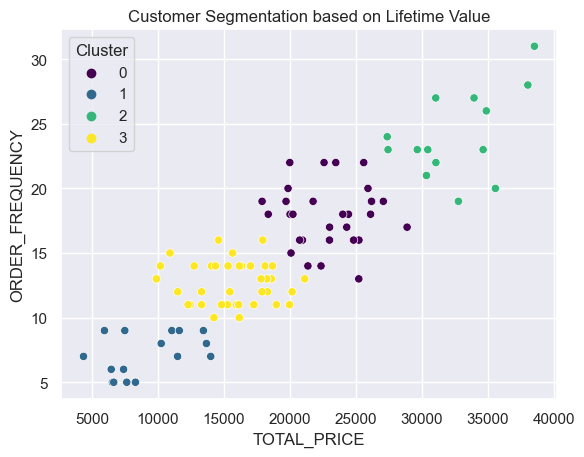

In [37]:
# Visualize the clusters
sns.scatterplot(data=df, x='TOTAL_PRICE', y='ORDER_FREQUENCY', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation based on Lifetime Value')
plt.savefig('cluster1.png', format='png', bbox_inches='tight')
plt.show()

In [38]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="*****************************************")

import PIL.Image

img = PIL.Image.open("cluster1.png")
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(img)

response = model.generate_content(["Explain it by points in simple and clear terms. Provide key findings and actionable insights based on the cluster visualization", img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> The visualization shows the customer segmentation based on their lifetime value. The data is clustered into four segments using an unsupervised learning algorithm. The clusters are plotted based on their total price and order frequency. 
> 
> * **Cluster 0 (Purple)**: This cluster has high order frequency and a moderately high total price. This segment can be considered as **"Loyal Customers"**. They are highly engaged with the brand and make frequent purchases.
> 
> * **Cluster 1 (Blue)**: This cluster has a moderate order frequency and a low total price. This segment can be considered as **"Regular Customers"**. They purchase frequently but their purchase value is less compared to the other clusters.
> 
> * **Cluster 2 (Green)**: This cluster has a high order frequency and a very high total price. This segment can be considered as **"High-Value Customers"**. They make frequent purchases and their average purchase value is high. 
> 
> * **Cluster 3 (Yellow)**: This cluster has a moderate order frequency and a low total price. This segment can be considered as **"Occasional Customers"**. Their purchase frequency and value are low.
> 
> **Actionable Insights**
> 
> * **Focus on Cluster 2 (High-Value Customers)**: This segment contributes the most to the overall revenue. These customers should be nurtured and rewarded with special offers and promotions.
> * **Engage with Cluster 0 (Loyal Customers)**:  These customers are highly engaged with the brand, so it's important to maintain their loyalty. This can be done by providing them with exclusive benefits and personalized experiences.
> * **Boost Cluster 1 (Regular Customers)**: These customers have the potential to become more valuable customers. The brand can focus on increasing their average purchase value by offering them value-added products or services.
> * **Target Cluster 3 (Occasional Customers)**: This cluster has the potential to become more engaged with the brand. The brand can target them with special offers and promotions to encourage them to make more purchases.


# Market Basket Analysis

In [39]:
query = "SELECT * FROM public.marketbasket"
df = pd.read_sql_query(query, connection)
df.head()

,ORDER_ID,PRODUCTS
0,ORD0001,"[Eatery, Furniture]"
1,ORD0002,"[Clothing, Utensils]"
2,ORD0003,[Electronics]
3,ORD0004,[Sports Equipment]
4,ORD0005,"[Electronics, Eatery]"


In [46]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Data Preprocessing
# Transform the 'PRODUCTS' column into a list of lists suitable for the Apriori algorithm
transactions = df['PRODUCTS'].tolist()

# Use TransactionEncoder to one-hot encode the data
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_array, columns=te.columns_)

# Step 2: Apply Apriori Algorithm
# Set minimum support threshold as desired (e.g., 0.2 for at least 20% frequency)
frequent_itemsets = apriori(df_trans, min_support=0.1, use_colnames=True)

# Step 3: Generate Association Rules
# Set thresholds for confidence and lift for strong association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

# Display the association rules
print(rules)

Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


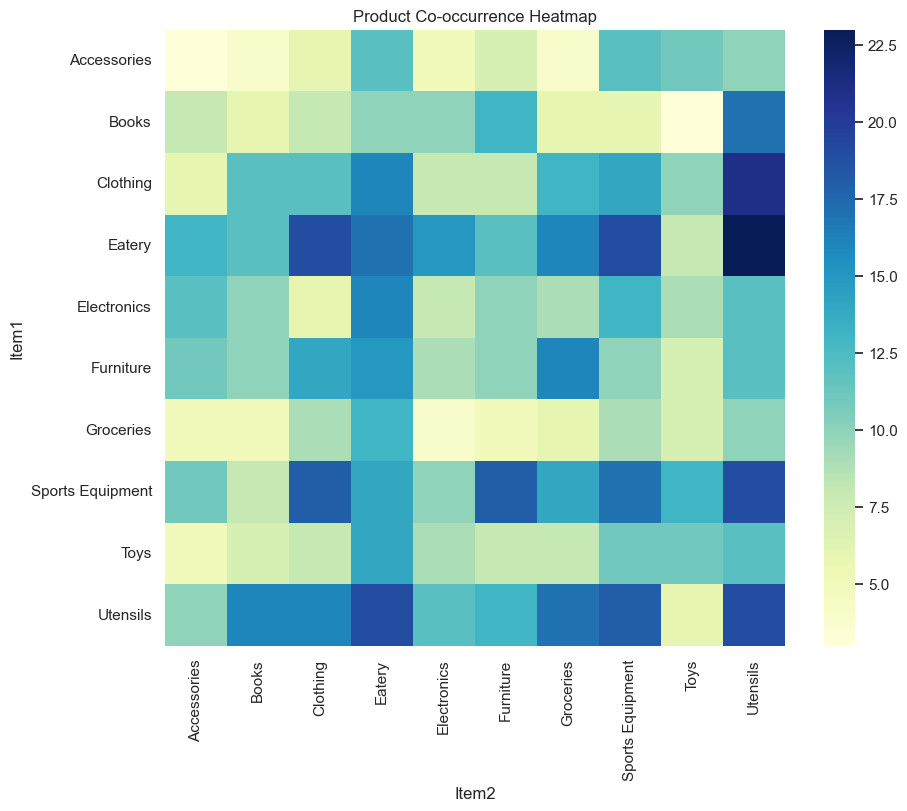

In [50]:
from itertools import combinations
from collections import Counter

# Expand each order into all possible pairs of items
pairs = []
for items in df['PRODUCTS']:
    pairs.extend(combinations(items, 2))

# Count frequency of each pair
pair_counts = Counter(pairs)
pair_df = pd.DataFrame(pair_counts.items(), columns=['Pair', 'Count'])
pair_df[['Item1', 'Item2']] = pd.DataFrame(pair_df['Pair'].tolist(), index=pair_df.index)
pivot_df = pair_df.pivot('Item1', 'Item2', 'Count').fillna(0)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap="YlGnBu")
plt.title('Product Co-occurrence Heatmap')
plt.savefig('heatmap.png', format='png', bbox_inches='tight')
plt.show()

In [51]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="************************************************")

import PIL.Image

img = PIL.Image.open("heatmap.png")
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(img)

response = model.generate_content(["Explain it by points in simple and clear terms. Provide key findings and actionable insights based on the product frequency pair", img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> The heatmap shows the co-occurrence of different product categories in customer orders.  Here are the key findings and actionable insights:
> 
> **Key Findings**
> 
> * **High co-occurrence of Eatary and Toys:** This suggests that customers often purchase toys when they buy food from eateries. This could be because of family outings or celebrations.
> * **High co-occurrence of Sports Equipment and Electronics:** This indicates that customers frequently buy sports equipment and electronics together. It's possible that these items are associated with fitness and entertainment activities.
> * **High co-occurrence of Utensils and Accessories:** This suggests that customers often buy accessories along with utensils. This could be because of purchasing kitchenware items. 
> 
> **Actionable Insights:**
> 
> * **Cross-promotion:** Leverage the high co-occurrence by offering discounts or bundles for items that are frequently purchased together. For example, bundle toys with eatery orders, offer discounts on electronics when purchasing sports equipment, and promote utensils and accessories together.
> * **Store layout and product placement:** Consider placing related products close to each other to encourage impulse purchases. For instance, placing toys near eatery sections or electronics near sports equipment. 
> * **Targeted marketing:**  Use customer data to segment customers based on their purchase history and target them with specific offers related to the products they frequently purchase. 
> * **Understanding customer behavior:**  The co-occurrence data can help businesses understand customer shopping habits and preferences. This information can be used to refine product offerings, improve inventory management, and create personalized customer experiences.


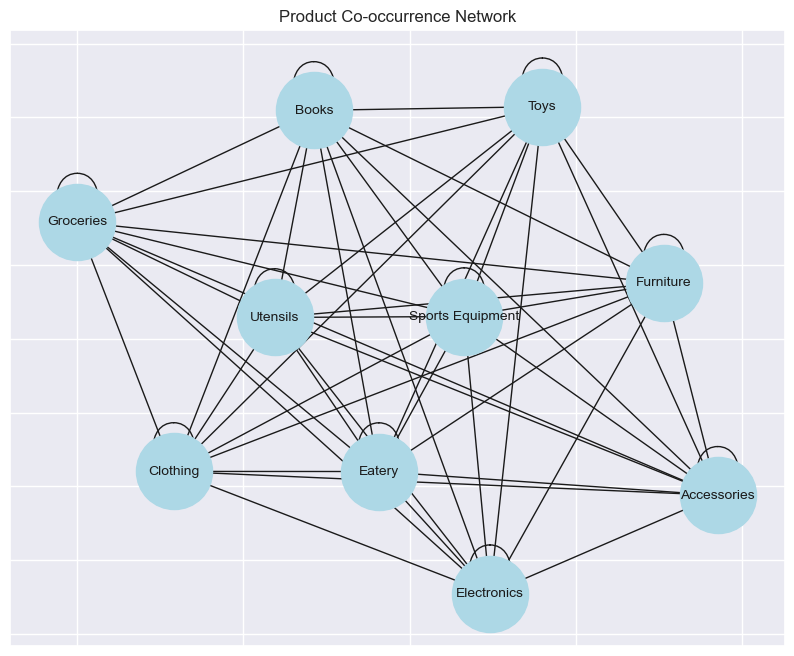

In [53]:
import networkx as nx

# Initialize graph
G = nx.Graph()

# Add nodes and edges for pairs with a high count (e.g., > 1 for small data)
for (item1, item2), count in pair_counts.items():
    if count > 1:
        G.add_edge(item1, item2, weight=count)

# Draw network graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10)
plt.title('Product Co-occurrence Network')
plt.savefig('network.png', format='png', bbox_inches='tight')
plt.show()

In [54]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="****************************************")

import PIL.Image

img = PIL.Image.open("network.png")
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(img)

response = model.generate_content(["Explain it by points in simple and clear terms. Provide key findings and actionable insights based on the product frequency pair network graph", img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> The graph depicts the co-occurrence of different product categories based on customer purchase data. The size of the nodes represents the frequency of the product categories, and the thickness of the lines represents the frequency of co-occurrence between categories. The key findings and actionable insights are:
> 
> **Key Findings**
> 
> * **High Co-occurrence:**
>     * Groceries, Clothing, Toys, and Electronics are highly co-occurring product categories. This means customers often purchase these products together.
>     * Toys and Sports Equipment have a high co-occurrence.
> * **Moderate Co-occurrence:**
>     * Books, Utensils, and Sports Equipment are moderately co-occurring with most other product categories. This suggests customers purchase these items less frequently together, but the co-occurrence is still significant.
> * **Low Co-occurrence:**
>     * Accessories and Furniture have a lower co-occurrence with other product categories, suggesting that they are less frequently bought together.
>     * Eatery has a lower co-occurrence, suggesting they are less frequently bought together.
> 
> **Actionable Insights**
> 
> * **Marketing Bundles:** The high co-occurrence between Groceries, Clothing, Toys, and Electronics suggests an opportunity to create bundles or special offers that include these product categories.
> * **Product Placement:** Place high co-occurrence items together in physical stores to encourage impulse purchases.
> * **Targeted Advertising:** Use the co-occurrence data to target specific customer segments with relevant ads. For example, customers who purchase Toys might also be interested in Sports Equipment.
> * **Cross-selling Opportunities:** Train customer service representatives to suggest related products based on the co-occurrence data. 
> * **Inventory Management:** Use the co-occurrence data to optimize inventory levels and predict future demand for certain products.
> * **Market Research:** Analyze the co-occurrence data to gain insights into customer preferences and purchase behavior.
> * **New Product Development:** Consider developing new products or services that complement existing high co-occurrence categories.
> * **Category Expansion:** The lower co-occurrence of Accessories and Furniture could indicate potential for expanding those categories or exploring new products in those areas.
> 
> By leveraging the insights from this co-occurrence network, businesses can optimize their marketing, sales, and product strategies to improve customer satisfaction and increase revenue.


# Pricing Strategy

In [55]:
query = "SELECT * FROM public.pricingstrategy"
df = pd.read_sql_query(query, connection)
df.head()

,ORDER_ID,PRODUCT_CATEGORY,QUANTITY,ITEM_PRICE,ORDER_DATE,TOTAL_PRICE
0,ORD0657,Eatery,8.0,433.23,2023-03-17,3465.84
1,ORD0138,Furniture,6.0,20.07,2024-02-27,120.42
2,ORD0611,Sports Equipment,8.0,446.32,2024-08-05,3570.56
3,ORD0530,Electronics,7.0,91.58,2022-11-10,641.06
4,ORD0095,Accessories,7.0,421.49,2023-12-13,2950.43


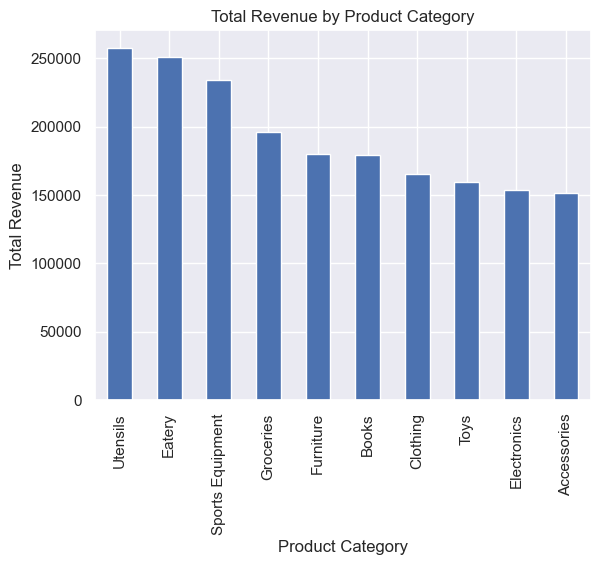

In [56]:
# Calculate total revenue by product category
revenue_by_category = df.groupby('PRODUCT_CATEGORY')['TOTAL_PRICE'].sum().sort_values(ascending=False)
revenue_by_category.plot(kind='bar', title='Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.savefig('revenue.png', format='png', bbox_inches='tight')
plt.show()

In [58]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="**************************************")

import PIL.Image

img = PIL.Image.open("revenue.png")
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(img)

response = model.generate_content(["Explain it by points in simple and clear terms. Provide key findings and actionable insights based on the product total revenue", img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> ## Key Findings:
> 
> - **Utensils** and **Eatary** have the highest total revenue, exceeding 250,000.
> - **Sports Equipment** has the third highest revenue, followed by **Groceries** and **Furniture**.
> - The remaining product categories, **Books**, **Clothing**, **Toys**, **Electronics**, and **Accessories**, generate significantly lower revenue, ranging from 150,000 to 160,000.
> 
> ## Actionable Insights:
> 
> - **Focus on high-revenue categories:** Invest more resources in marketing, product development, and sales efforts for **Utensils**, **Eatary**, and **Sports Equipment** to further increase revenue.
> - **Explore growth opportunities in lower-revenue categories:** Analyze the reasons for lower revenue in **Books**, **Clothing**, **Toys**, **Electronics**, and **Accessories**. Consider strategies like price adjustments, promotions, new product launches, or targeted marketing campaigns to boost sales. 
> - **Monitor market trends:** Track the performance of different product categories and adjust your strategies based on evolving customer preferences and market dynamics.
> - **Consider diversification:** While high-revenue categories are promising, diversify your product portfolio to reduce reliance on a limited number of product categories. Explore opportunities in emerging or growing markets. 


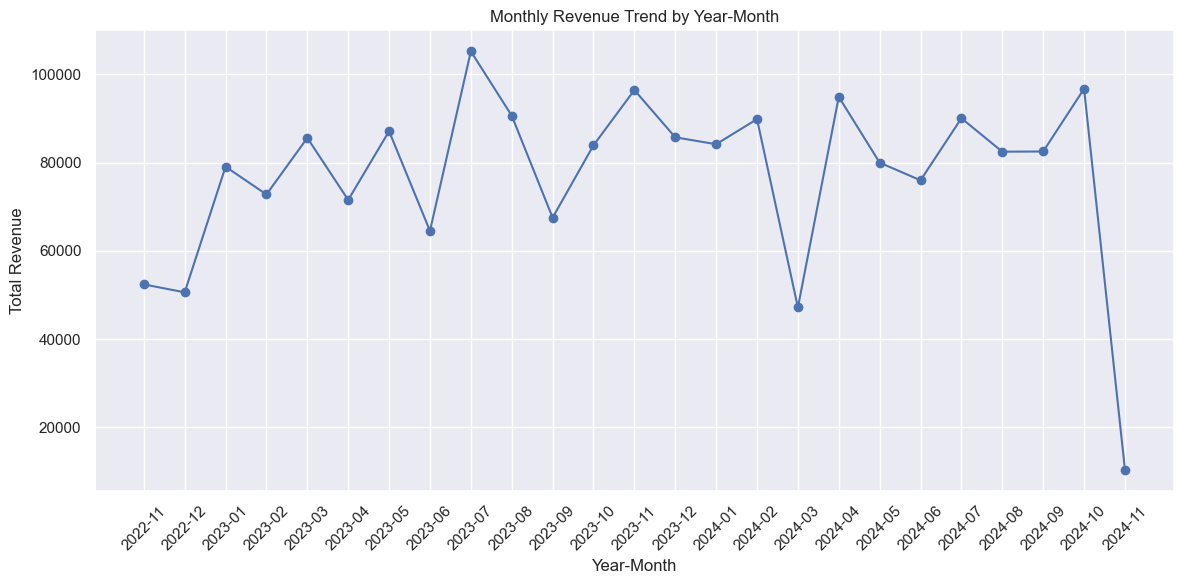

In [60]:
# Convert ORDER_DATE to datetime (if not already done)
df['ORDER_DATE'] = pd.to_datetime(df['ORDER_DATE'])

# Create a new column for Year-Month
df['YearMonth'] = df['ORDER_DATE'].dt.to_period('M')

# Group by Year-Month and calculate total revenue
revenue_by_month = df.groupby('YearMonth')['TOTAL_PRICE'].sum()

# Reset the index to make it a DataFrame for plotting
revenue_by_month = revenue_by_month.reset_index()

# Convert YearMonth back to a string for better formatting in the plot
revenue_by_month['YearMonth'] = revenue_by_month['YearMonth'].astype(str)

# Plotting the revenue by Year-Month
plt.figure(figsize=(12, 6))
plt.plot(revenue_by_month['YearMonth'], revenue_by_month['TOTAL_PRICE'], marker='o')
plt.title('Monthly Revenue Trend by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit everything
plt.savefig('trend.png', format='png', bbox_inches='tight')
plt.show()

In [61]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="*************************************")

import PIL.Image

img = PIL.Image.open("trend.png")
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(img)

response = model.generate_content(["Explain it by points in simple and clear terms. Provide key findings and actionable insights based on the monthly revenue trend", img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> ## Monthly Revenue Trend Analysis
> 
> **Key Findings:**
> 
> * **Fluctuating Revenue:** The monthly revenue demonstrates a fluctuating trend with significant peaks and dips.
> * **Highest Revenue:**  The highest revenue was achieved in July 2023, followed by April 2024 and September 2023.
> * **Lowest Revenue:** The lowest revenue was recorded in November 2024.
> * **Seasonal Patterns:** While not consistent, there seem to be some seasonal patterns. For example, revenue tends to be higher in the spring and summer months compared to fall and winter months.
> 
> 
> **Actionable Insights:**
> 
> * **Identify Drivers of Fluctuations:** Conduct a deeper analysis to understand the factors driving the revenue fluctuations. This could involve examining marketing campaigns, seasonal trends, competitor activity, or any other relevant factors.
> * **Optimize for High-Revenue Months:** Based on the insights gained, strategize to capitalize on high-revenue months. This could involve increasing marketing efforts, introducing new products or services, or offering special promotions.
> * **Address Revenue Dips:** Analyze the periods of low revenue to identify the contributing factors and devise strategies to mitigate them. This could involve adjusting pricing, optimizing marketing channels, or exploring new markets.
> * **Monitor and Adapt:** Regularly monitor the revenue trend and adjust strategies accordingly. The market is dynamic, and responding to changes effectively is key to achieving sustainable revenue growth.
> 
> 
> **Further Recommendations:**
> 
> * **Detailed Data Analysis:**  Analyze the revenue trend alongside other relevant data such as customer acquisition, customer retention, product performance, and market trends to gain a comprehensive understanding of the business performance. 
> * **Forecasting:** Based on historical data and insights, create revenue forecasts for the future. This will allow for better planning and resource allocation.
> * **Benchmarking:** Compare the revenue trend to industry benchmarks to assess the company's performance relative to competitors.
> 
> By taking proactive steps to understand and address the revenue trends, the business can optimize its operations and achieve its revenue targets. 


# Sales Forecasting

In [73]:
query = "SELECT * FROM public.salesforecasting"
df = pd.read_sql_query(query, connection)
df.head()

,ORDER_ID,ORDER_DATE,TOTAL_SALES_AMOUNT,TOTAL_ITEMS_SOLD
0,ORD0657,2023-03-17,3465.84,8.0
1,ORD0138,2024-02-27,2580.27,22.0
2,ORD0611,2024-08-05,6447.46,18.0
3,ORD0095,2023-12-13,2950.43,7.0
4,ORD0258,2023-12-23,2161.64,8.0


In [74]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np

ADF Statistic: -26.495568850959238
p-value: 0.0
                               SARIMAX Results                                
Dep. Variable:     TOTAL_SALES_AMOUNT   No. Observations:                  729
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -6924.590
Date:                Tue, 05 Nov 2024   AIC                          13857.181
Time:                        07:32:52   BIC                          13875.547
Sample:                    11-05-2022   HQIC                         13864.267
                         - 11-02-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2644.3479    180.637     14.639      0.000    2290.306    2998.390
ar.L1          0.4339      1.123      0.386      0.699      -1.767       2.635
ma.L

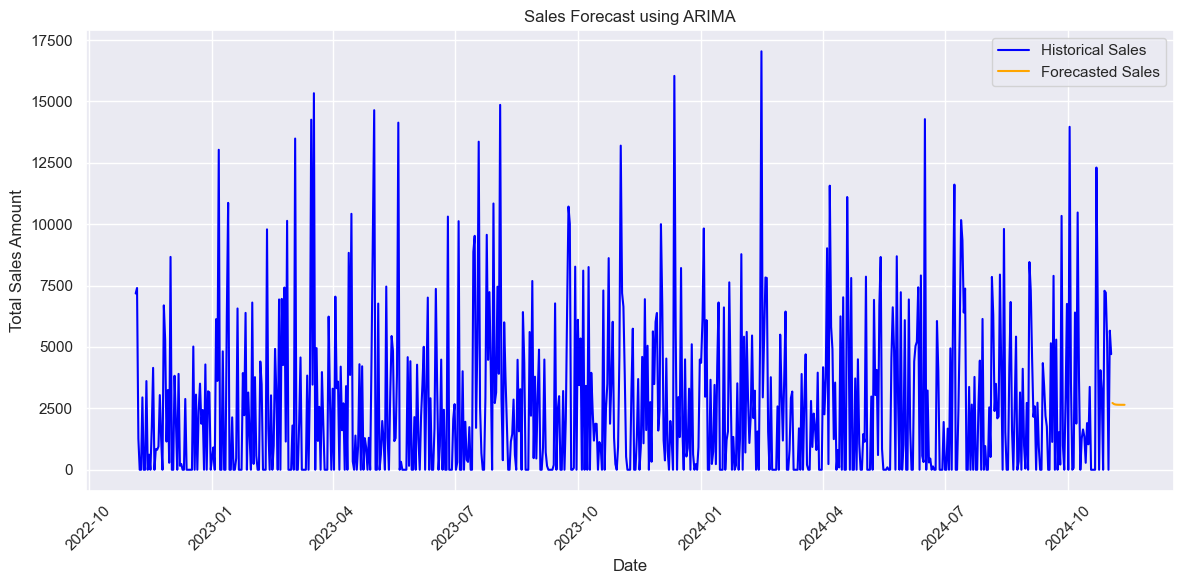

In [75]:
import warnings
warnings.filterwarnings("ignore")

# Convert ORDER_DATE to datetime
df['ORDER_DATE'] = pd.to_datetime(df['ORDER_DATE'])

# Set the ORDER_DATE as the index
df.set_index('ORDER_DATE', inplace=True)

# Resample the data to daily frequency (sum sales per day)
daily_sales = df['TOTAL_SALES_AMOUNT'].resample('D').sum()

# Check for stationarity using ADF test
adf_test = adfuller(daily_sales)
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

# If p-value > 0.05, the series is non-stationary and may need differencing
# For simplicity, let's apply first differencing
daily_sales_diff = daily_sales.diff().dropna()

# Fit ARIMA model (Replace (p,d,q) with chosen values)
model = ARIMA(daily_sales, order=(1, 0, 1))  # Example order
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecasting the next 180 days
forecast = model_fit.forecast(steps=180)
forecast_index = pd.date_range(start=daily_sales.index[-1] + pd.Timedelta(days=1), periods=10)
forecast_series = pd.Series(forecast, index=forecast_index)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Historical Sales', color='blue')
plt.plot(forecast_series, label='Forecasted Sales', color='orange')
plt.title('Sales Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('arima_forecast.png', format='png', bbox_inches='tight')
plt.show()

# Stock Analysis

In [76]:
query = "SELECT * FROM public.stockanalysis"
df = pd.read_sql_query(query, connection)
df.head()

,PRODUCT_CATEGORY,STOCK_QUANTITY,TOTAL_SOLD,STOCK_LEFT
0,Eatery,56.0,58.0,-2.0
1,Furniture,274.0,33.0,241.0
2,Sports Equipment,929.0,72.0,857.0
3,Electronics,976.0,55.0,921.0
4,Accessories,369.0,21.0,348.0


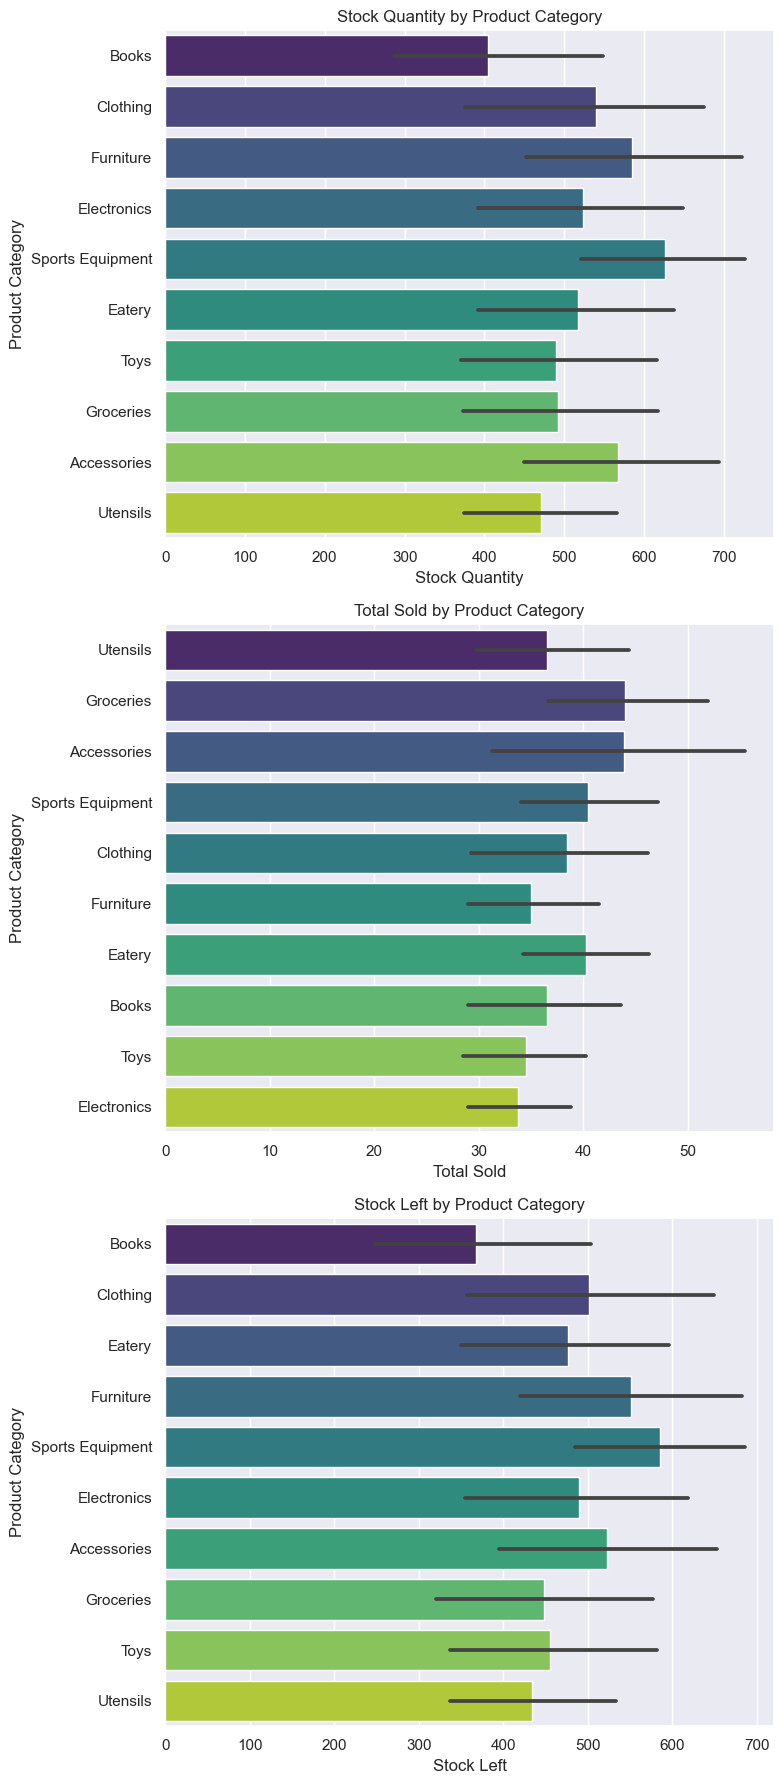

In [84]:
# Calculate Stock Left
df['STOCK_LEFT'] = df['STOCK_QUANTITY'] - df['TOTAL_SOLD']

# Set the figure size
plt.figure(figsize=(8, 18))

# Sort the DataFrame for each plot
df_stock_quantity = df.sort_values('STOCK_QUANTITY', ascending=False)
df_total_sold = df.sort_values('TOTAL_SOLD', ascending=False)
df_stock_left = df.sort_values('STOCK_LEFT', ascending=False)

# Create a bar plot for STOCK QUANTITY
plt.subplot(3, 1, 1)  # 3 rows, 1 column, first subplot
sns.barplot(y='PRODUCT_CATEGORY', x='STOCK_QUANTITY', data=df_stock_quantity, palette='viridis')
plt.title('Stock Quantity by Product Category')
plt.ylabel('Product Category')
plt.xlabel('Stock Quantity')

# Create a bar plot for TOTAL SOLD
plt.subplot(3, 1, 2)  # 3 rows, 1 column, second subplot
sns.barplot(y='PRODUCT_CATEGORY', x='TOTAL_SOLD', data=df_total_sold, palette='viridis')
plt.title('Total Sold by Product Category')
plt.ylabel('Product Category')
plt.xlabel('Total Sold')

# Create a bar plot for STOCK LEFT
plt.subplot(3, 1, 3)  # 3 rows, 1 column, third subplot
sns.barplot(y='PRODUCT_CATEGORY', x='STOCK_LEFT', data=df_stock_left, palette='viridis')
plt.title('Stock Left by Product Category')
plt.ylabel('Product Category')
plt.xlabel('Stock Left')

# Adjust layout
plt.tight_layout()

# Save the plot to a file
plt.savefig('stock_analysis_visualization_vertical_sorted.png', dpi=300)

# Show the plot
plt.show()

In [85]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="**************************************")

import PIL.Image

img = PIL.Image.open("stock_analysis_visualization_vertical_sorted.png")
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(img)

response = model.generate_content(["Explain it by points in simple and clear terms. Provide key findings and actionable insights based on the stock analysis visualization", img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> ## Stock Analysis Visualization: Key Findings and Actionable Insights
> 
> **Stock Quantity by Product Category**
> 
> - **High Stock:** "Books" and "Utensils" have the highest stock quantity, suggesting potential overstocking in these categories.
> - **Low Stock:** "Electronics" and "Sports Equipment" have the lowest stock quantity, indicating potential supply shortages or high demand.
> - **Variability:** The error bars indicate significant variability in stock quantity within each category, suggesting inconsistent inventory management.
> 
> **Actionable Insights:**
> 
> - **Re-evaluate Stock Levels:** Analyze the demand trends for "Books" and "Utensils" to determine if there is a genuine need for such high stock levels. Consider implementing strategies like discounts or promotions to reduce surplus inventory.
> - **Improve Forecasting:** Enhance demand forecasting for "Electronics" and "Sports Equipment" to optimize stock levels and avoid supply shortages.
> - **Streamline Inventory Management:** Implement strategies to minimize stock quantity variability across all categories. This could involve tighter stock control procedures, improved demand forecasting, or more frequent inventory adjustments.
> 
> **Total Sold by Product Category**
> 
> - **High Sales:** "Groceries" and "Sports Equipment" show the highest sales volume, indicating strong customer demand in these categories.
> - **Low Sales:** "Electronics" and "Toys" have the lowest sales volume, highlighting potential issues with pricing, marketing, or product appeal.
> - **Sales Trends:** Analyzing the sales trends over time can provide valuable insights into customer preferences and seasonality.
> 
> **Actionable Insights:**
> 
> - **Maximize Sales:** Focus on strategies to further increase sales in "Groceries" and "Sports Equipment" by exploring new product offerings, marketing campaigns, or loyalty programs.
> - **Identify Growth Opportunities:** Investigate the factors hindering sales in "Electronics" and "Toys" and implement corrective actions, such as price adjustments, product redesigns, or targeted marketing efforts.
> - **Data-Driven Decisions:** Continuously monitor sales trends and adjust inventory and marketing strategies accordingly to maximize profitability.
> 
> **Stock Left by Product Category**
> 
> - **High Stock Left:** "Furniture" and "Sports Equipment" have significant stock left, suggesting potential overstocking or sluggish sales.
> - **Low Stock Left:** "Books" and "Clothing" have the least stock left, indicating either high demand or efficient inventory management.
> - **Stock Turnover:** The combination of stock left and total sold provides insights into stock turnover rates, which can be further analyzed to identify slow-moving products or optimize inventory flow.
> 
> **Actionable Insights:**
> 
> - **Reduce Excess Inventory:** Implement strategies to reduce stock levels for "Furniture" and "Sports Equipment," potentially through discounts, promotions, or strategic marketing campaigns.
> - **Optimize Stock Management:** Analyze the reasons behind the low stock levels in "Books" and "Clothing" to understand if it's driven by demand or effective inventory control.
> - **Improve Stock Turnover:** Utilize data on stock turnover rates to optimize inventory flow, minimize stockouts, and enhance profitability.
> 
> Overall, the stock analysis visualization provides valuable insights into inventory management practices and customer demand trends. By analyzing these key findings and implementing the actionable insights, the company can optimize its inventory strategy, maximize sales, and improve profitability.

# Sentiment Analysis

In [87]:
query = "SELECT * FROM public.sentimentanalysis"
df = pd.read_sql_query(query, connection)
df.head()

,REVIEW_ID,PRODUCT_CATEGORY,CUSTOMER_ID,REVIEW_DATE,REVIEW_TEXT
0,REV0001,Furniture,CUST033,2022-12-29,This product is well-made and performs as expe...
1,REV0002,Toys,CUST083,2023-08-18,I’m disappointed with the product. It’s not as...
2,REV0003,Electronics,CUST073,2023-09-21,This product does exactly what it says. Very h...
3,REV0004,Eatery,CUST027,2024-03-06,"The product works well, but the customer servi..."
4,REV0005,Groceries,CUST076,2023-06-15,This is a solid product that performs well. I ...


In [94]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Load the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# Function to perform sentiment analysis
def analyze_sentiment(review):
    inputs = tokenizer(review, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
    predicted_class_id = logits.argmax().item()
    return model.config.id2label[predicted_class_id]

# Analyze sentiment for each review and store the results in a new column
df['SENTIMENT'] = df['REVIEW_TEXT'].apply(analyze_sentiment)
df.head()

model.safetensors:  90%|######### | 241M/268M [00:00<?, ?B/s]

,REVIEW_ID,PRODUCT_CATEGORY,CUSTOMER_ID,REVIEW_DATE,REVIEW_TEXT,SENTIMENT
0,REV0001,Furniture,CUST033,2022-12-29,This product is well-made and performs as expe...,POSITIVE
1,REV0002,Toys,CUST083,2023-08-18,I’m disappointed with the product. It’s not as...,NEGATIVE
2,REV0003,Electronics,CUST073,2023-09-21,This product does exactly what it says. Very h...,POSITIVE
3,REV0004,Eatery,CUST027,2024-03-06,"The product works well, but the customer servi...",NEGATIVE
4,REV0005,Groceries,CUST076,2023-06-15,This is a solid product that performs well. I ...,POSITIVE


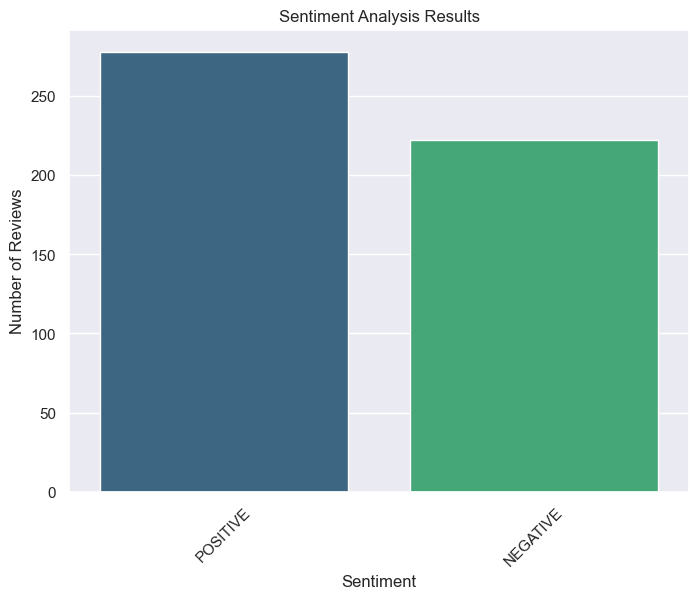

In [95]:
# Count the occurrences of each sentiment
sentiment_counts = df['SENTIMENT'].value_counts()

# Plotting the sentiment analysis results
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.savefig('sentiment_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [99]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK stopwords if you haven't already
nltk.download('punkt')
nltk.download('stopwords')

# Define the function for text normalization
def normalize_text(text):
    # Lowercase the text
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word not in string.punctuation]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply the normalization function to the REVIEW_TEXT column
df['CLEANED_REVIEW_TEXT'] = df['REVIEW_TEXT'].apply(normalize_text)

# Display the DataFrame with the cleaned text
df[['REVIEW_TEXT', 'CLEANED_REVIEW_TEXT']]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,REVIEW_TEXT,CLEANED_REVIEW_TEXT
0,This product is well-made and performs as expe...,product well-made performs expected
1,I’m disappointed with the product. It’s not as...,’ disappointed product ’ good advertised
2,This product does exactly what it says. Very h...,product exactly says happy
3,"The product works well, but the customer servi...",product works well customer service helpful
4,This is a solid product that performs well. I ...,solid product performs well would recommend
...,...,...
495,"The product is good, but I had some issues wit...",product good issues shipping
496,Fantastic product! I’m very satisfied with thi...,fantastic product ’ satisfied purchase
497,This is a high-quality product. I would defini...,high-quality product would definitely buy
498,I’m pleased with this purchase. The product wo...,’ pleased purchase product works described


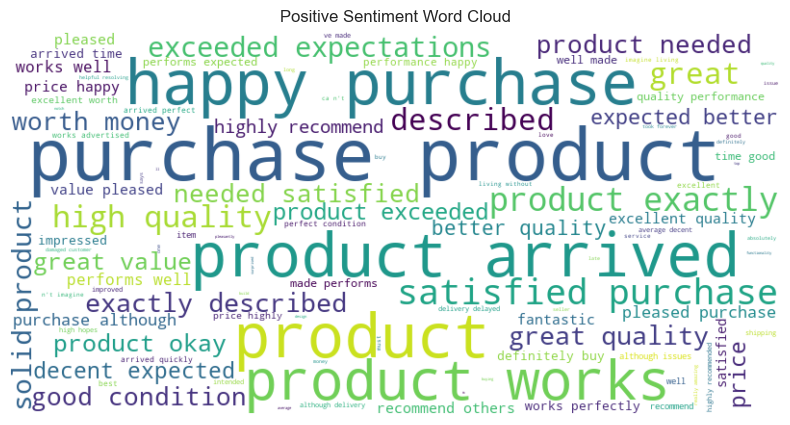

In [101]:
from wordcloud import WordCloud

# Define a function to generate and save a word cloud
def generate_wordcloud(text, title, filename):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    
    # Save the word cloud as a PNG file
    plt.savefig(filename, format='png', bbox_inches='tight')
    plt.show()
    
positive_reviews = ' '.join(df[df['SENTIMENT'] == 'POSITIVE']['CLEANED_REVIEW_TEXT'])
generate_wordcloud(positive_reviews, title='Positive Sentiment Word Cloud', filename='positive_sentiment_wordcloud.png')

In [102]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="***************************************")

import PIL.Image

img = PIL.Image.open("positive_sentiment_wordcloud.png")
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(img)

response = model.generate_content(["Explain it by points in simple and clear terms. Provide key findings and actionable insights based on the positive sentiment wordcloud", img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> ## Positive Sentiment Word Cloud Analysis
> 
> **Key Findings:**
> 
> * **Product Quality is Highly Appreciated:** Words like "quality," "excellent," "great," "perfect," "high," and "value" are prominent, indicating a strong emphasis on the product's quality and its perceived value. 
> * **Customer Satisfaction:** Words like "satisfied," "happy," "pleased," and "love" highlight the positive sentiments associated with the product and the purchase experience. 
> * **Positive Purchase Experience:**  "Purchase," "arrived," and "works" are frequently used, suggesting customers are satisfied with the entire process, from ordering to receiving and using the product.
> * **Strong Recommendation:** "Recommend," "highly," and "described" indicate that customers would recommend the product to others.
> 
> **Actionable Insights:**
> 
> * **Focus on High-Quality Products:** Continue to emphasize the high quality of the product as it is a key driver of customer satisfaction and loyalty. 
> * **Improve Customer Experience:** Ensure a smooth and positive purchase experience, from browsing to delivery. 
> * **Leverage Positive Reviews:**  Highlight the positive reviews and testimonials in marketing materials to build trust and encourage new customers.
> * **Promote the Benefits:**  Clearly communicate the value proposition of the product and how it solves customers' needs.
> * **Address Negative Sentiment:**  While the word cloud focuses on positive sentiment, it's essential to understand and address any negative feedback to continuously improve the product and customer experience. 


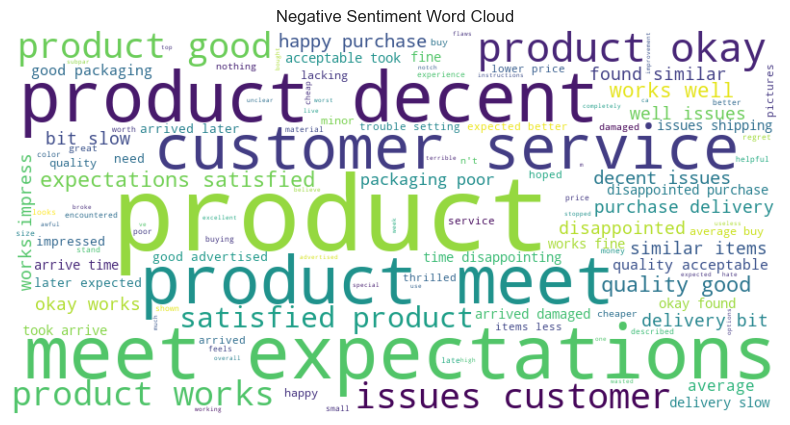

In [103]:
from wordcloud import WordCloud

# Define a function to generate and save a word cloud
def generate_wordcloud(text, title, filename):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    
    # Save the word cloud as a PNG file
    plt.savefig(filename, format='png', bbox_inches='tight')
    plt.show()
    
positive_reviews = ' '.join(df[df['SENTIMENT'] == 'NEGATIVE']['CLEANED_REVIEW_TEXT'])
generate_wordcloud(positive_reviews, title='Negative Sentiment Word Cloud', filename='negative_sentiment_wordcloud.png')

In [104]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="******************************************")

import PIL.Image

img = PIL.Image.open("negative_sentiment_wordcloud.png")
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(img)

response = model.generate_content(["Explain it by points in simple and clear terms. Provide key findings and actionable insights based on the negative sentiment wordcloud", img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> ## Key Findings and Actionable Insights from the Negative Sentiment Word Cloud:
> 
> **Key Findings:**
> 
> * **Product and Delivery Issues are Most Frequent:** The word cloud highlights concerns about product quality, delivery, and meeting expectations.
> * **Customer Service Issues are Also Prominent:** Negative sentiment towards customer service is apparent, with words like "issues", "disappointed", and "poor" appearing prominently.
> * **Overall Negative Sentiment:** The presence of negative words like "decent", "disappointing", and "trouble" suggests a general feeling of dissatisfaction with the company. 
> 
> **Actionable Insights:**
> 
> * **Improve Product Quality and Consistency:** Address the specific issues mentioned in the word cloud, such as "quality", "similar items", and "acceptable". Ensure products meet quality standards and are consistent.
> * **Prioritize Delivery and Shipping:** Focus on improving the speed, reliability, and communication surrounding delivery. Address issues like "late", "average", and "slow".
> * **Enhance Customer Service:** Train employees to handle customer complaints and inquiries effectively. Ensure they are responsive, helpful, and understanding.
> * **Communicate Effectively:** Be transparent with customers about potential issues and proactively address concerns. 
> * **Gather More Specific Feedback:** Conduct targeted surveys and gather detailed feedback on specific product and service aspects to gain a deeper understanding of customers' negative experiences.
> 
> By addressing these issues, the company can improve customer satisfaction and mitigate negative sentiment. 


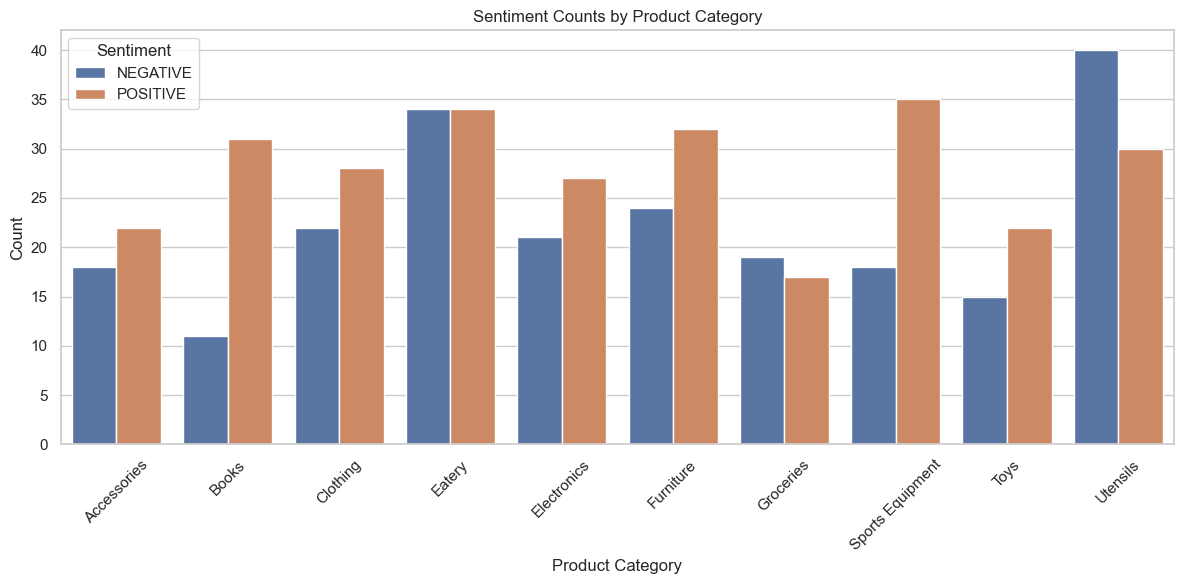

In [107]:
# Create a new DataFrame to count sentiments for each product category
sentiment_counts = df.groupby(['PRODUCT_CATEGORY', 'SENTIMENT']).size().unstack(fill_value=0)

# Reset the index for easier plotting
sentiment_counts = sentiment_counts.reset_index()
sentiment_counts = sentiment_counts.melt(id_vars='PRODUCT_CATEGORY', var_name='SENTIMENT', value_name='COUNT')

# Set the style for the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=sentiment_counts, x='PRODUCT_CATEGORY', y='COUNT', hue='SENTIMENT')

# Add titles and labels
plt.title('Sentiment Counts by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('sentiment_counts_by_product_category.png', format='png', bbox_inches='tight')

In [111]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="***********************************************")

import PIL.Image

img = PIL.Image.open("sentiment_counts_by_product_category.png")
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(img)

response = model.generate_content(["Explain it by points in simple and clear terms. Provide key findings and actionable insights based on the SENTIMENT COUNTS BY PRODUCT CATEGORY", img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> The graph shows the sentiment counts for different product categories. Here are some key findings and actionable insights based on the data:
> 
> **Key Findings:**
> 
> * **Overall, positive sentiment dominates negative sentiment for most product categories.** This suggests that, generally, customers are happy with the products they are buying.
> * **Utensials and Sports Equipment have the highest number of negative sentiments.** This could indicate that there are some issues with these products that need to be addressed.
> * **Electronics and Eatary have a relatively higher number of negative sentiments compared to other categories.** This could be due to the high expectation of quality and performance in these categories.
> 
> **Actionable Insights:**
> 
> * **Focus on improving customer satisfaction for Utensials and Sports Equipment.** This could involve addressing common complaints, improving product quality, or providing better customer service.
> * **Monitor customer feedback closely for Electronics and Eatary.** Pay attention to any emerging issues and take steps to address them promptly.
> * **Continue to provide high-quality products and excellent customer service.** This will help to maintain positive sentiment for all product categories.
> * **Conduct further research to identify the specific reasons for negative sentiment in certain categories.** This information can be used to develop targeted strategies for improvement.
> * **Consider using sentiment analysis tools to track customer sentiment over time.** This will help to identify any changes in customer perceptions and take proactive steps to address them. 


# Power BI Visualization

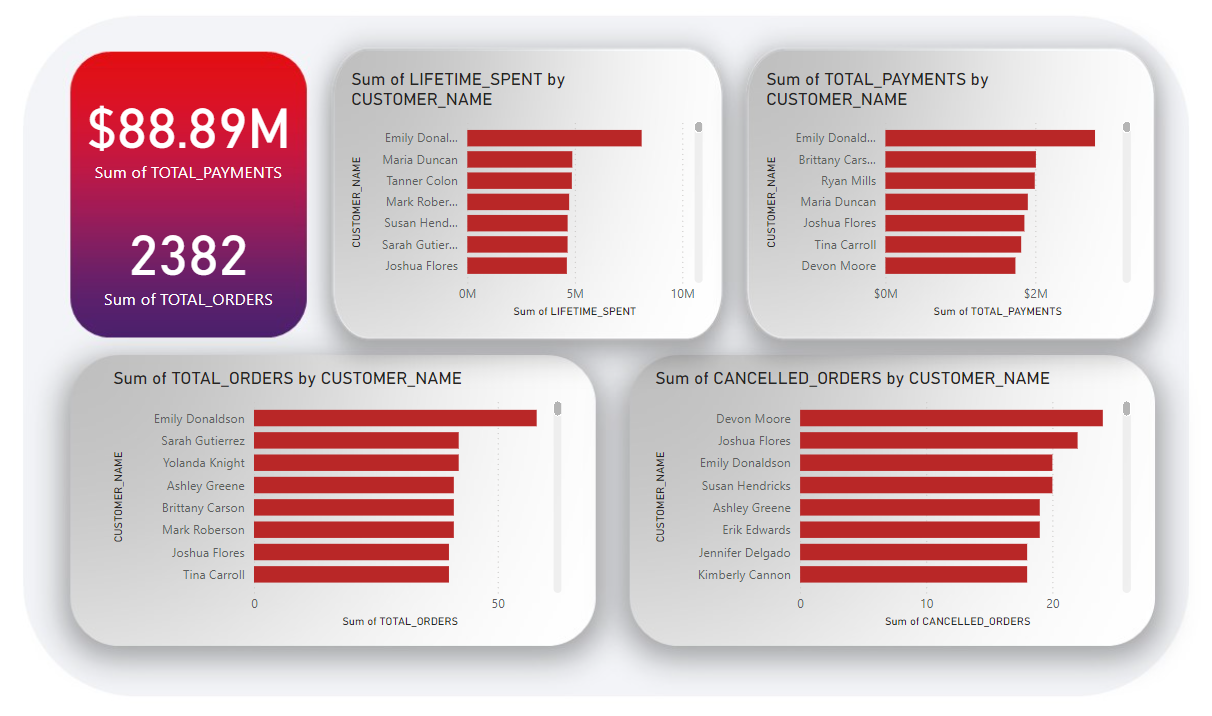

In [112]:
from IPython.display import Image, display

# Display the image
display(Image(filename='dash.PNG'))

In [114]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="****************************************")

import PIL.Image

img = PIL.Image.open("dash.PNG")
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(img)

response = model.generate_content(["Explain it by points in simple and clear terms. Provide key findings and actionable insights based on the content", img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> ## Key Findings and Actionable Insights:
> 
> **Overall Performance:**
> 
> - The company generated $88.89M in total payments from 2382 orders. 
> 
> **Customer Segmentation:**
> 
> - **High-Spending Customers:** Emily Donald, Brittany Cars, Ryan Mills, Maria Duncan, Joshua Flores, Tina Carroll, and Devon Moore are the top customers in terms of total payments. Focus on retaining and upselling to these customers.
> - **High-Engagement Customers:** Emily Donaldson, Sarah Gutierrez, Yolanda Knight, Ashley Greene, Brittany Carson, Mark Roberson, Joshua Flores, and Tina Carroll are the customers with the highest number of orders. Understand their purchase patterns and offer personalized recommendations.
> - **Customers with High Cancellation Rates:** Devon Moore, Joshua Flores, Emily Donaldson, Susan Hendricks, Ashley Greene, Erik Edwards, Jennifer Delgado, and Kimberly Cannon have a high number of cancelled orders. Analyze the reasons behind cancellations and take necessary steps to improve customer satisfaction.
> 
> **Actionable Insights:**
> 
> - **Customer Retention:** Implement loyalty programs and personalized offers for high-spending customers to ensure their continued business.
> - **Customer Acquisition:** Develop targeted marketing campaigns to attract customers similar to those with high engagement.
> - **Customer Service:** Address the reasons behind cancellations and improve customer service processes to minimize future cancellations.
> - **Product Development:** Analyze purchase patterns of high-engagement customers to identify popular products and develop new offerings based on their preferences.
> 
> **Further Analysis:**
> 
> - Analyze the lifetime spent by each customer to understand their value and growth potential.
> - Track the customer acquisition cost (CAC) and customer lifetime value (CLTV) to optimize marketing spend.
> - Utilize data analytics to identify patterns and trends in customer behavior, allowing for more targeted and effective strategies.


# Deploy Churn Prediction with Docker and FastAPI

### main.py

In [ ]:
from fastapi import FastAPI, HTTPException
from fastapi.responses import HTMLResponse
from fastapi.templating import Jinja2Templates
from fastapi import Request
from pydantic import BaseModel
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

app = FastAPI()
templates = Jinja2Templates(directory="templates")

# Load your model and data processing pipeline here
df = pd.read_csv('customerchurn.csv')
df['Churn'] = df['DAYS_SINCE_LAST_ORDER'].apply(lambda x: "Churn" if x > 60 else "Not Churn")
df.drop(columns=['CUSTOMER_NAME', 'LAST_ORDER_DATE', 'FIRST_ORDER_DATE', 'DAYS_SINCE_LAST_ORDER', 'LAST_PAYMENT_DATE'], inplace=True)

# Encoding categorical features
for col in df.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Train the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42, max_depth=None, max_features='sqrt', n_estimators=200, class_weight='balanced')
rfc.fit(X_train, y_train)

class CustomerData(BaseModel):
    LIFETIME_SPENT: float
    TOTAL_ORDERS: int
    AVG_ORDER_VALUE: float
    TOTAL_PAYMENTS: float
    CANCELLED_ORDERS: int

@app.get("/", response_class=HTMLResponse)
async def get_form(request: Request):
    return templates.TemplateResponse("index.html", {"request": request})

@app.post("/predict")
async def predict(data: CustomerData):
    input_data = np.array([[data.LIFETIME_SPENT, data.TOTAL_ORDERS, data.AVG_ORDER_VALUE, data.TOTAL_PAYMENTS, data.CANCELLED_ORDERS]])
    prediction = rfc.predict(input_data)
    probability = rfc.predict_proba(input_data)[:, 1]
    
    # Convert NumPy types to native Python types
    return {
        "prediction": prediction[0].item(),  # Convert to Python native type
        "probability": probability[0].item()  # Convert to Python native type
    }

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="127.0.0.1", port=8000)

### index.html

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Churn Prediction</title>
</head>
<body>
    <h1>Churn Prediction Form</h1>
    <form id="predict-form">
        <label for="lifetime_spent">Lifetime Spent:</label>
        <input type="text" id="lifetime_spent" name="LIFETIME_SPENT" required><br>

        <label for="total_orders">Total Orders:</label>
        <input type="text" id="total_orders" name="TOTAL_ORDERS" required><br>

        <label for="avg_order_value">Average Order Value:</label>
        <input type="text" id="avg_order_value" name="AVG_ORDER_VALUE" required><br>

        <label for="total_payments">Total Payments:</label>
        <input type="text" id="total_payments" name="TOTAL_PAYMENTS" required><br>

        <label for="cancelled_orders">Cancelled Orders:</label>
        <input type="text" id="cancelled_orders" name="CANCELLED_ORDERS" required><br>

        <button type="submit">Predict</button>
    </form>

    <div id="result"></div>

    <script>
        document.getElementById('predict-form').addEventListener('submit', async function(event) {
            event.preventDefault();

            const formData = new FormData(this);
            const data = Object.fromEntries(formData.entries());

            const response = await fetch('/predict', {
                method: 'POST',
                headers: {
                    'Content-Type': 'application/json'
                },
                body: JSON.stringify(data)
            });

            const result = await response.json();
            document.getElementById('result').innerText = `Prediction: ${result.prediction}, Probability: ${result.probability}`;
        });
    </script>
</body>
</html>

### requirements.txt

In [ ]:
fastapi
uvicorn
pandas
scikit-learn
numpy
jinja2

### dockerfile

In [ ]:
# Use the official Python image from the Docker Hub
FROM python:3.9-slim

# Set the working directory in the container
WORKDIR /app

# Copy the requirements file into the container
COPY requirements.txt .

# Install the necessary packages
RUN pip install --no-cache-dir -r requirements.txt

# Copy the rest of your application code into the container
COPY . .

# Expose the port that FastAPI runs on
EXPOSE 8000

# Command to run the FastAPI application using uvicorn
CMD ["uvicorn", "main:app", "--host", "0.0.0.0", "--port", "8000", "--reload"]

### Docker Image

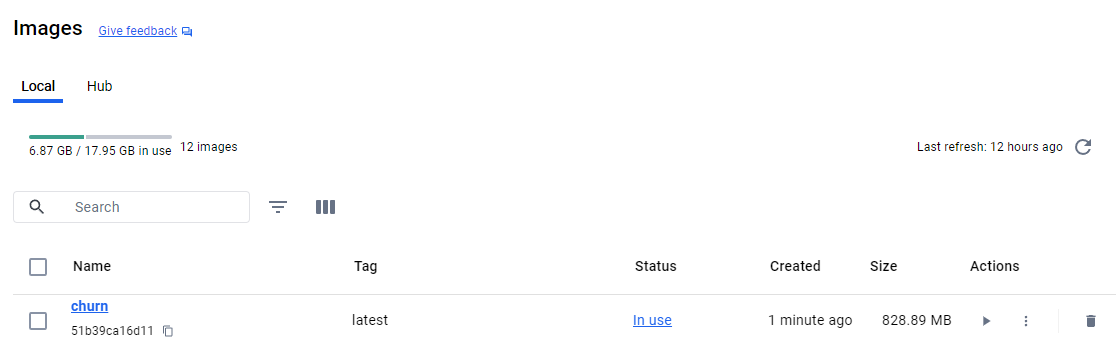

### Result

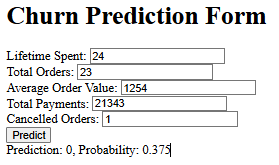